## Analiza Environmental data: Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib widget

### Prvi korak - istraživanje podataka

In [3]:
data = pd.read_csv("environment_data.csv")

In [4]:
data.columns

Index(['timestamp', 'sound', 'pressure', 'temp', 'humidity', 'voc', 'pm1.0',
       'pm2.5', 'pm10', 'CO2'],
      dtype='object')

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345151 entries, 2022-11-07 00:00:01 to 2022-11-10 23:59:59
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sound     345151 non-null  float64
 1   pressure  345151 non-null  float64
 2   temp      345151 non-null  float64
 3   humidity  345151 non-null  float64
 4   voc       345151 non-null  float64
 5   pm1.0     345151 non-null  float64
 6   pm2.5     345151 non-null  float64
 7   pm10      345151 non-null  float64
 8   CO2       344264 non-null  float64
dtypes: float64(9)
memory usage: 26.3 MB


In [7]:
data.head()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 00:00:01  0.881076  1012.037290  24.777757  35.996349  29466.0   
2022-11-07 00:00:02  0.863325  1012.025698  24.762371  36.002125  29467.0   
2022-11-07 00:00:03  0.908509  1012.083523  24.767500  36.013384  29459.0   
2022-11-07 00:00:04  0.924645  1012.091207  24.767500  36.013384  29454.0   
2022-11-07 00:00:05  0.896406  1012.091207  24.764935  36.013405  29458.5   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-07 00:00:01   26.0   36.0  45.0  421.0  
2022-11-07 00:00:02   26.0   36.0  45.0  419.0  
2022-11-07 00:00:03   26.0   36.0  45.0  418.0  
2022-11-07 00:00:04   26.0   36.0  44.0  418.0  
2022-11-07 00:00:05   26.0   36.0  44.0  416.0

In [8]:
data.tail()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-10 23:59:55  1.045672  1023.909475  25.752187  34.016978  29363.0   
2022-11-10 23:59:56  1.042445  1023.909475  25.747058  34.022710  29374.0   
2022-11-10 23:59:57  1.110220  1023.901703  25.736801  34.022842  29379.0   
2022-11-10 23:59:58  1.046479  1023.878387  25.729108  34.054104  29372.5   
2022-11-10 23:59:59  1.131198  1023.905394  25.726544  34.045638  29359.0   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-10 23:59:55   31.0   45.0  56.0  467.0  
2022-11-10 23:59:56   31.0   45.0  56.0  467.0  
2022-11-10 23:59:57   31.0   45.0  56.0  467.0  
2022-11-10 23:59:58   30.5   44.5  55.5  468.0  
2022-11-10 23:59:59   30.0   44.0  55.0  470.0

In [9]:
data.describe()

sound       pressure           temp       humidity  \
count  345151.000000  345151.000000  345151.000000  345151.000000   
mean        1.035109    1014.807431      25.123033      34.636160   
std         0.493434       2.517912       1.210600       2.652997   
min         0.000000    1005.339453      20.326285      26.962989   
25%         0.931100    1013.215952      24.470044      32.984199   
50%         1.035990    1014.020586      24.972642      34.628268   
75%         1.229633    1015.415069      25.782958      36.830740   
max         3.303227    1024.071917      28.293446      41.651724   

                 voc          pm1.0          pm2.5           pm10  \
count  345151.000000  345151.000000  345151.000000  345151.000000   
mean    30512.354483      49.980410      68.674444      79.883421   
std      1329.625356      27.035828      31.107893      30.668957   
min     28427.000000      20.000000      30.000000      33.000000   
25%     29458.000000      33.000000      48.000000      61.000000   
50%     29964.500000      38.000000      54.000000      68.000000   
75%     31443.000000      59.000000      85.000000      93.000000   
max     34535.000000     270.500000     279.500000     428.000000   

                 CO2  
count  344264.000000  
mean      442.465660  
std        28.831611  
min       400.000000  
25%       418.000000  
50%       440.000000  
75%       462.000000  
max       562.000000

In [10]:
data.var()

sound       2.434773e-01
pressure    6.339881e+00
temp        1.465552e+00
humidity    7.038394e+00
voc         1.767904e+06
pm1.0       7.309360e+02
pm2.5       9.677010e+02
pm10        9.405849e+02
CO2         8.312618e+02
dtype: float64

In [11]:
data.skew()

sound       0.390953
pressure    1.944262
temp        0.120681
humidity   -0.323284
voc         0.762294
pm1.0       1.698947
pm2.5       1.425518
pm10        1.516714
CO2         0.526927
dtype: float64

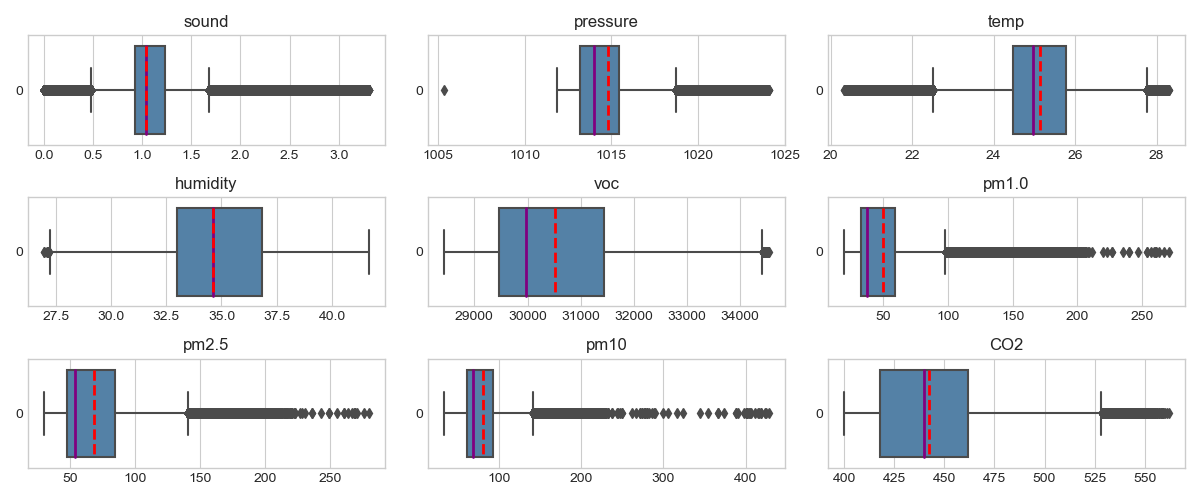

In [12]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(list(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True, meanline=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={'linewidth': 2, 'color': 'red'})
plt.tight_layout()

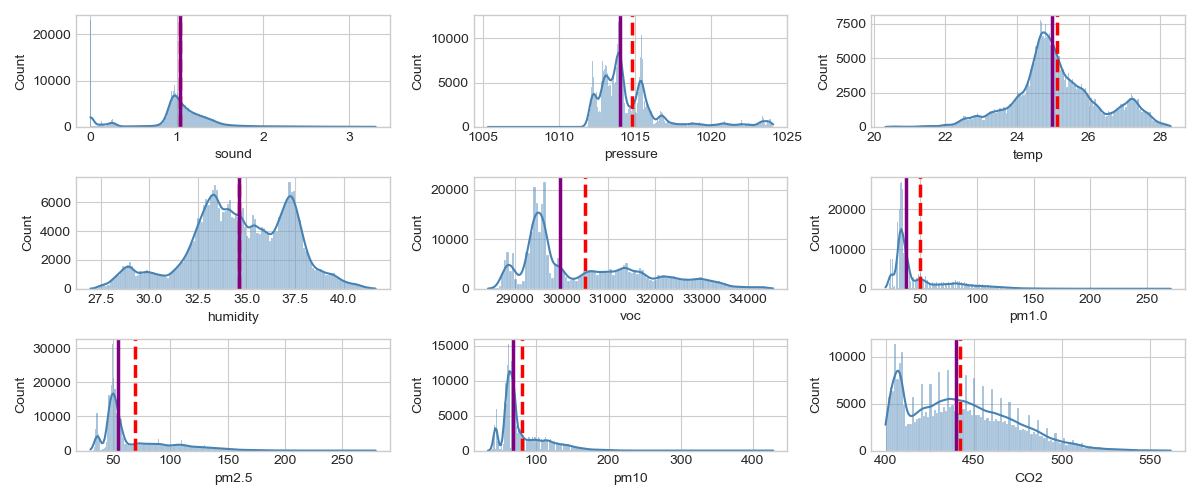

In [13]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(list(data.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True, color="steelblue")
    plt.axvline(x=data[feature].mean(), c='red', ls='--', lw=2.5)
    plt.axvline(x=data[feature].median(), c='purple', ls='-', lw=2.5)
plt.tight_layout()

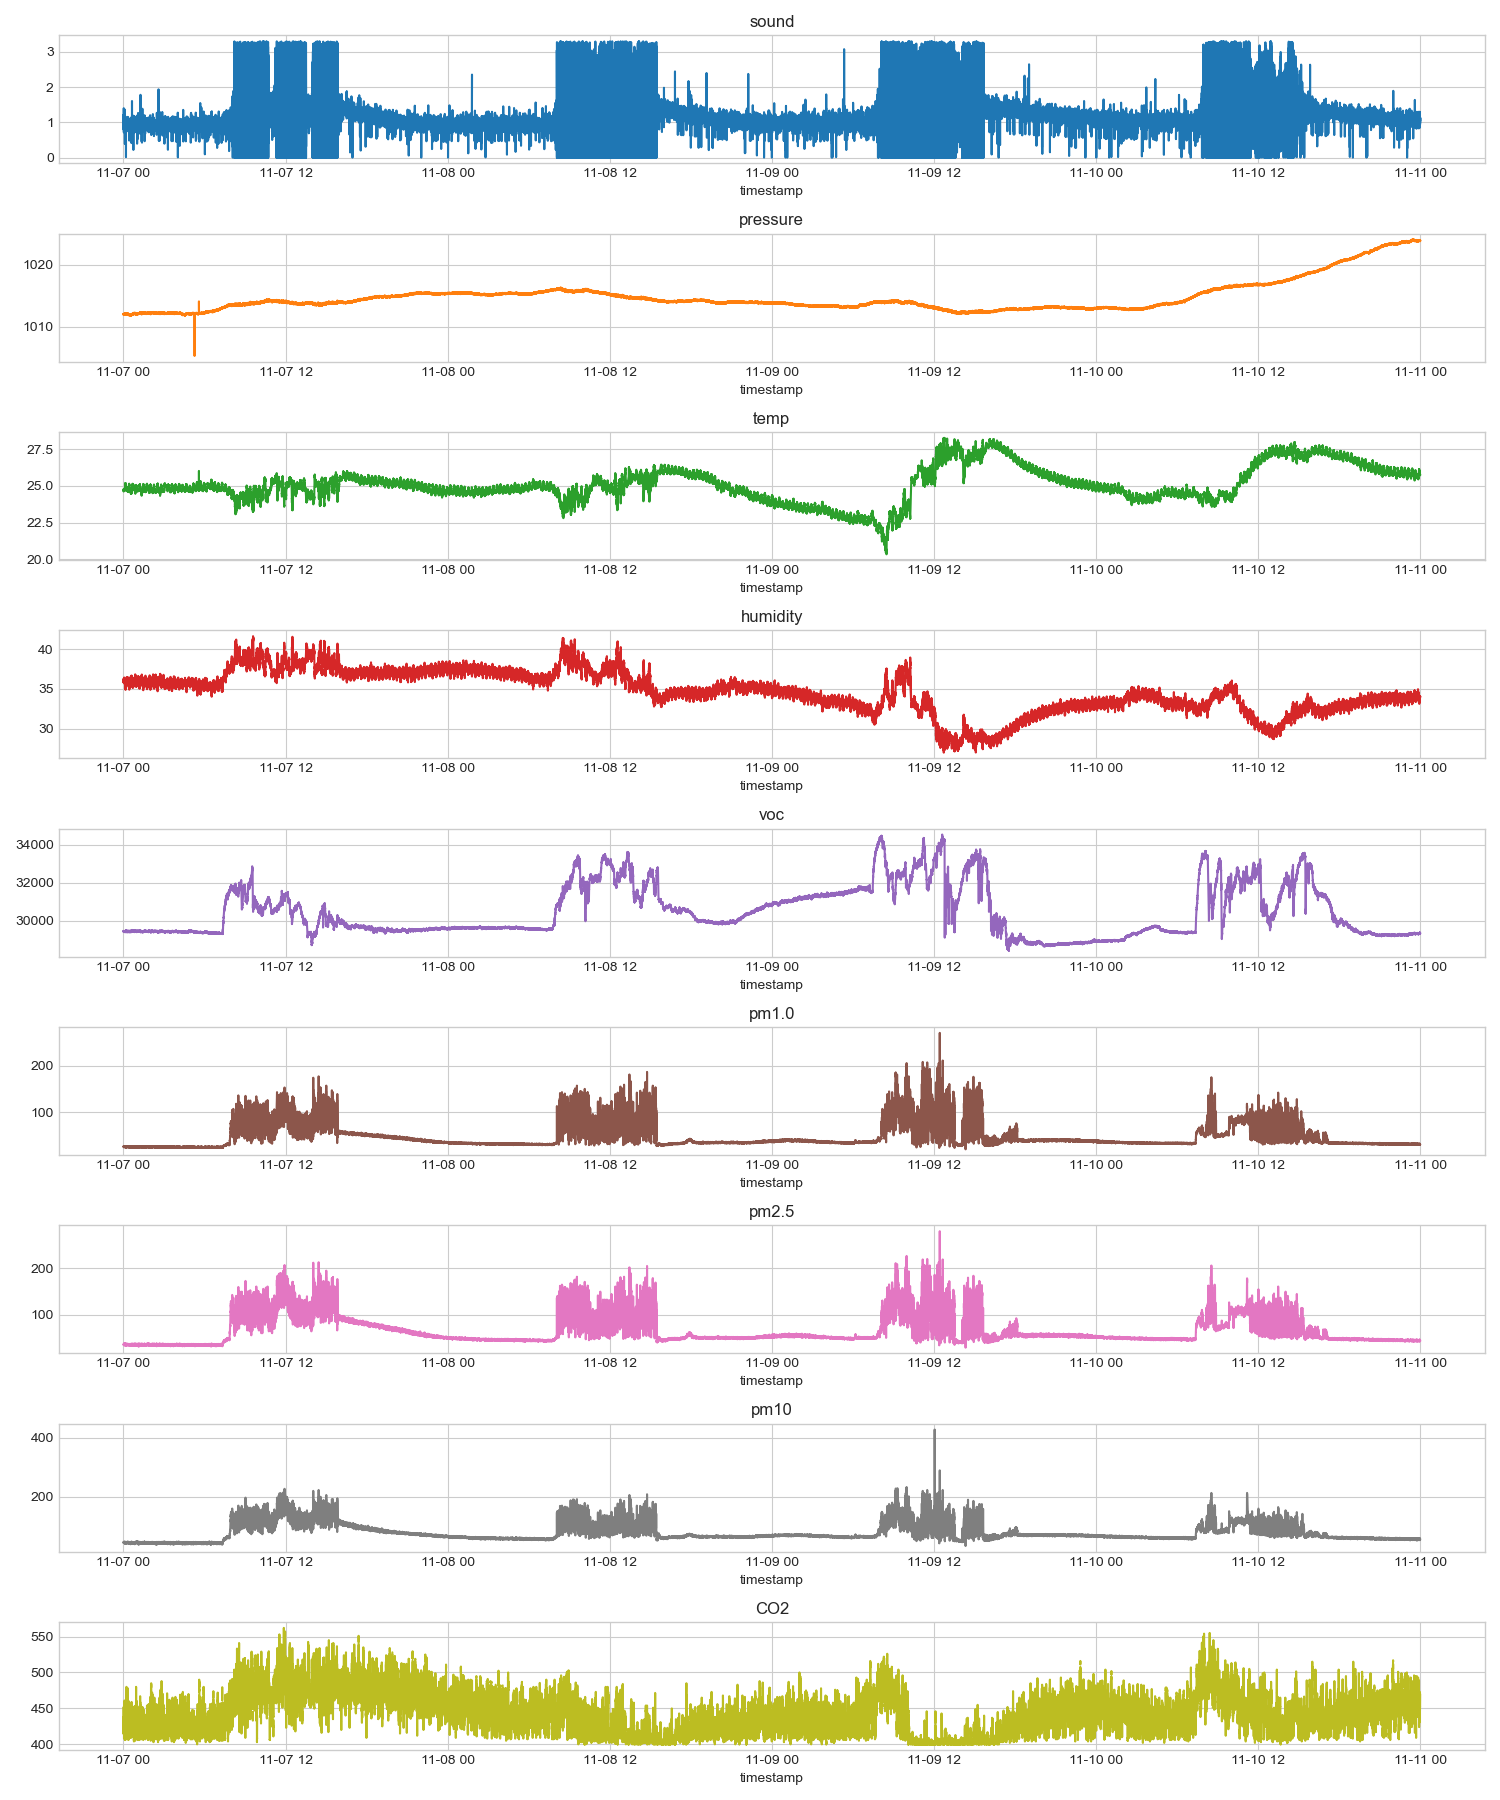

In [15]:
data.plot(figsize=(15, 18), subplots=True, sharex=False, legend=False, title=list(data.columns))
plt.tight_layout()

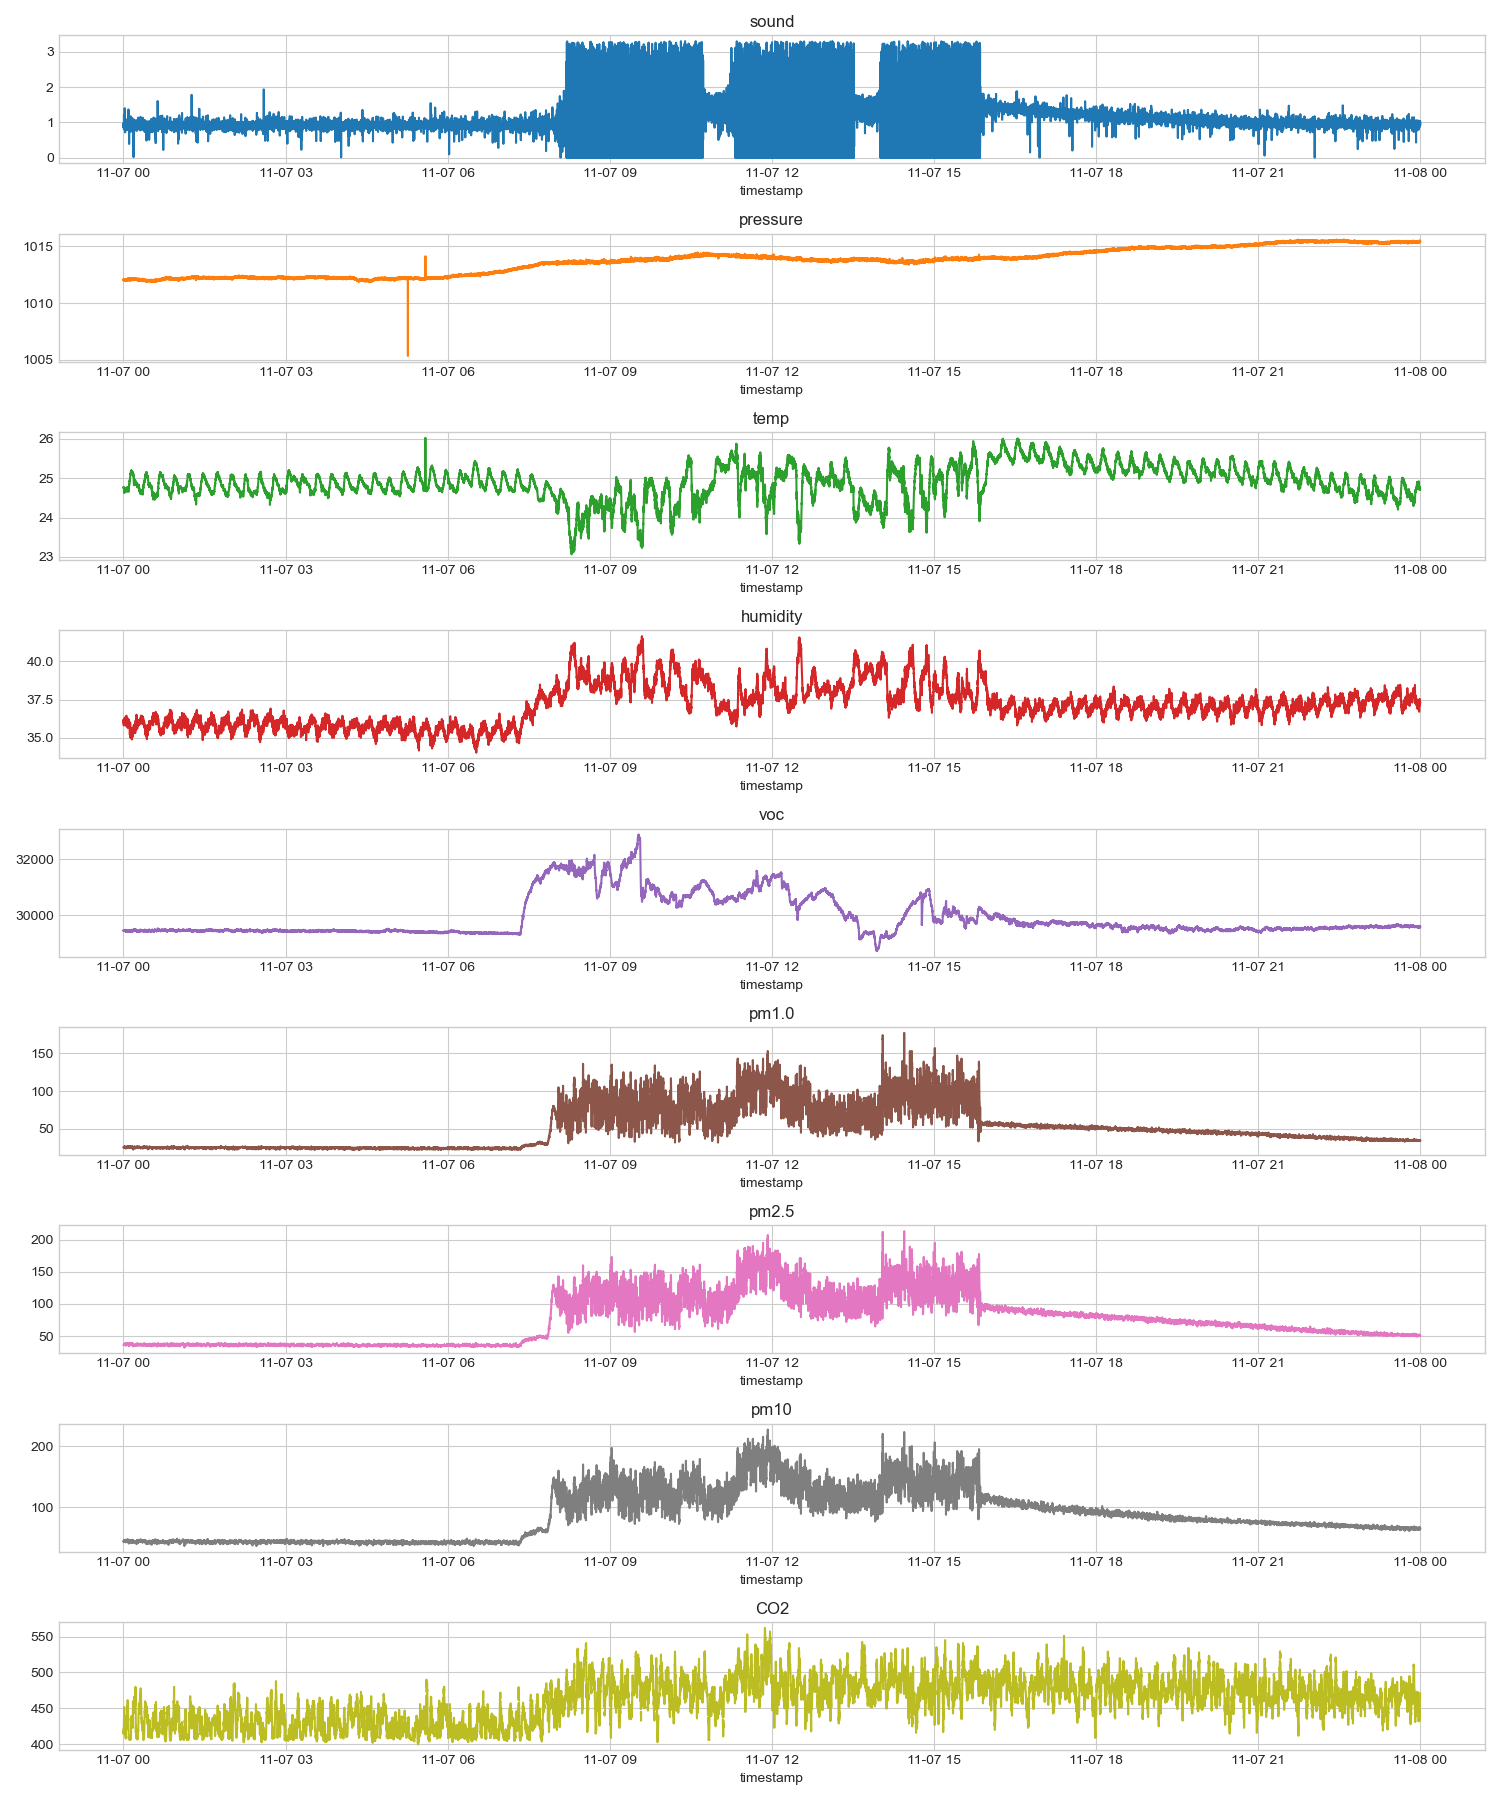

In [16]:
data[:86400].plot(figsize=(15, 18), subplots=True, sharex=False, legend=False, title=list(data.columns))
plt.tight_layout()

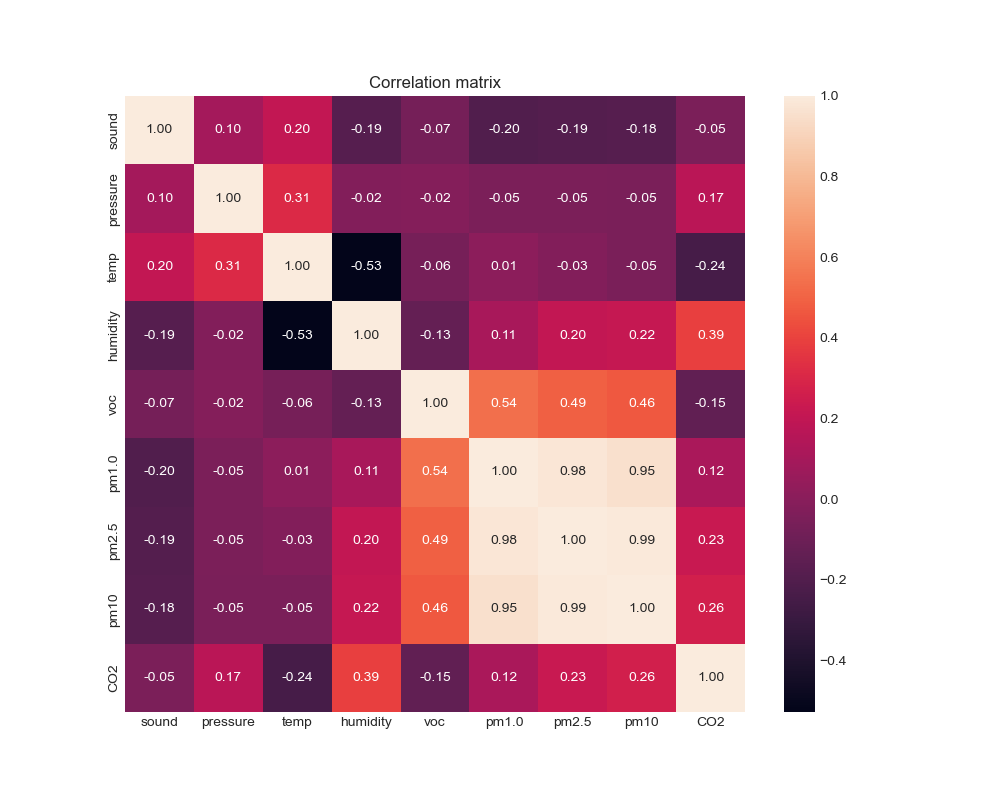

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

### Drugi korak - preprocesiranje podataka

In [18]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
sound         0
pressure      0
temp          0
humidity      0
voc           0
pm1.0         0
pm2.5         0
pm10          0
CO2         887
dtype: int64


In [19]:
imputer = SimpleImputer(strategy="mean")
data[['CO2']] = imputer.fit_transform(data[['CO2']])

In [20]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
sound       0
pressure    0
temp        0
humidity    0
voc         0
pm1.0       0
pm2.5       0
pm10        0
CO2         0
dtype: int64


In [21]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


In [22]:
print(f"Number of index duplicates in dataset: {data.index.duplicated().sum()}")

Number of index duplicates in dataset: 24


In [23]:
data[data.index.duplicated()]

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 01:00:00  0.927873  1012.029181  24.885456  35.769386  29454.0   
2022-11-07 05:00:00  0.929487  1012.083651  24.726471  35.821613  29466.0   
2022-11-07 09:00:00  0.731002  1013.577997  24.454659  38.499439  31630.0   
2022-11-07 10:00:00  1.844450  1013.874410  24.449530  38.928240  30666.0   
2022-11-07 11:00:00  1.591100  1014.204036  25.552171  36.589889  30518.0   
2022-11-07 16:00:00  1.391002  1013.957464  25.500885  37.518162  29939.0   
2022-11-08 04:00:00  0.874621  1015.260768  24.695700  37.036374  29647.0   
2022-11-08 05:00:00  1.032763  1015.392091  25.167527  36.219366  29643.0   
2022-11-08 07:00:00  0.916577  1015.672999  24.782885  36.691268  29551.0   
2022-11-08 11:00:00  0.950465  1015.642579  25.131627  36.813337  32351.0   
2022-11-08 12:00:00  1.899315  1015.222323  24.741857  38.182545  32943.0   
2022-11-08 15:00:00  0.000000  1014.405803  24.705957  36.657881  32743.0   
2022-11-09 08:00:00  1.006944  1014.055515  22.269931  32.164413  34351.0   
2022-11-09 14:00:00  1.358729  1012.260030  27.690820  27.930858  31607.0   
2022-11-09 16:00:00  1.457164  1012.446049  27.680563  28.620852  31522.0   
2022-11-09 17:00:00  1.392616  1012.778688  27.654919  28.963446  29666.0   
2022-11-09 20:00:00  1.263521  1013.127483  25.680386  32.244212  28815.0   
2022-11-09 23:00:00  1.118289  1013.048194  25.352156  32.515925  28827.0   
2022-11-10 09:00:00  2.055844  1016.085144  23.905907  34.982371  32659.0   
2022-11-10 10:00:00  2.057457  1016.529830  24.259775  34.911033  32403.0   
2022-11-10 12:00:00  0.414719  1016.921382  26.465065  30.742856  32603.0   
2022-11-10 13:00:00  1.160244  1017.015528  27.054862  30.252861  30294.0   
2022-11-10 17:00:00  1.273203  1019.435077  27.229237  32.337065  31342.0   
2022-11-10 21:00:00  0.982738  1022.787157  26.290692  33.442614  29251.0   

                     pm1.0  pm2.5   pm10    CO2  
timestamp                                        
2022-11-07 01:00:00   25.0   36.0   44.0  449.0  
2022-11-07 05:00:00   26.0   37.0   45.0  408.0  
2022-11-07 09:00:00   69.0  103.0  119.0  487.0  
2022-11-07 10:00:00   94.0  126.0  139.0  487.0  
2022-11-07 11:00:00   46.0   78.0   92.0  436.0  
2022-11-07 16:00:00   57.0   97.0  121.0  496.0  
2022-11-08 04:00:00   32.0   47.0   59.0  439.0  
2022-11-08 05:00:00   32.0   46.0   58.0  408.0  
2022-11-08 07:00:00   31.0   46.0   57.0  425.0  
2022-11-08 11:00:00   75.0   94.0  100.0  409.0  
2022-11-08 12:00:00   66.0   85.0   95.0  409.0  
2022-11-08 15:00:00  105.0  119.0  123.0  404.0  
2022-11-09 08:00:00   39.0   57.0   78.0  485.0  
2022-11-09 14:00:00   30.0   42.0   50.0  403.0  
2022-11-09 16:00:00   34.0   48.0   60.0  402.0  
2022-11-09 17:00:00   38.0   53.0   68.0  408.0  
2022-11-09 20:00:00   39.0   56.0   70.0  462.0  
2022-11-09 23:00:00   39.0   55.0   69.0  438.0  
2022-11-10 09:00:00   48.0   68.0   74.0  505.0  
2022-11-10 10:00:00   80.0  105.0  112.0  470.0  
2022-11-10 12:00:00   71.0   95.0  101.0  409.0  
2022-11-10 13:00:00   76.0   96.0  101.0  441.0  
2022-11-10 17:00:00   49.0   62.0   72.0  432.0  
2022-11-10 21:00:00   32.0   46.0   58.0  436.0

In [24]:
data = data[~data.index.duplicated(keep='first')]

In [25]:
data.resample('s').interpolate().reset_index()

timestamp     sound     pressure       temp   humidity  \
0      2022-11-07 00:00:01  0.881076  1012.037290  24.777757  35.996349   
1      2022-11-07 00:00:02  0.863325  1012.025698  24.762371  36.002125   
2      2022-11-07 00:00:03  0.908509  1012.083523  24.767500  36.013384   
3      2022-11-07 00:00:04  0.924645  1012.091207  24.767500  36.013384   
4      2022-11-07 00:00:05  0.896406  1012.091207  24.764935  36.013405   
...                    ...       ...          ...        ...        ...   
345594 2022-11-10 23:59:55  1.045672  1023.909475  25.752187  34.016978   
345595 2022-11-10 23:59:56  1.042445  1023.909475  25.747058  34.022710   
345596 2022-11-10 23:59:57  1.110220  1023.901703  25.736801  34.022842   
345597 2022-11-10 23:59:58  1.046479  1023.878387  25.729108  34.054104   
345598 2022-11-10 23:59:59  1.131198  1023.905394  25.726544  34.045638   

            voc  pm1.0  pm2.5  pm10    CO2  
0       29466.0   26.0   36.0  45.0  421.0  
1       29467.0   26.0   36.0  45.0  419.0  
2       29459.0   26.0   36.0  45.0  418.0  
3       29454.0   26.0   36.0  44.0  418.0  
4       29458.5   26.0   36.0  44.0  416.0  
...         ...    ...    ...   ...    ...  
345594  29363.0   31.0   45.0  56.0  467.0  
345595  29374.0   31.0   45.0  56.0  467.0  
345596  29379.0   31.0   45.0  56.0  467.0  
345597  29372.5   30.5   44.5  55.5  468.0  
345598  29359.0   30.0   44.0  55.0  470.0  

[345599 rows x 10 columns]

In [26]:
data.resample('30s').interpolate().reset_index()

timestamp     sound     pressure       temp   humidity  \
0     2022-11-07 00:00:00       NaN          NaN        NaN        NaN   
1     2022-11-07 00:00:30  0.956112  1012.062426  24.739293  36.041862   
2     2022-11-07 00:01:00  0.964988  1011.991563  24.623900  36.195291   
3     2022-11-07 00:01:30  0.995648  1012.033767  24.670057  36.177992   
4     2022-11-07 00:02:00  0.914963  1012.072187  24.711086  36.149430   
...                   ...       ...          ...        ...        ...   
11515 2022-11-10 23:57:30  1.106993  1023.900574  26.003489  33.594159   
11516 2022-11-10 23:58:00  1.086015  1023.942064  25.906045  33.742903   
11517 2022-11-10 23:58:30  1.086015  1023.956866  25.854759  33.873960   
11518 2022-11-10 23:59:00  1.071491  1023.875457  25.808601  33.953912   
11519 2022-11-10 23:59:30  1.047286  1023.828831  25.793215  33.976780   

           voc  pm1.0  pm2.5  pm10    CO2  
0          NaN    NaN    NaN   NaN    NaN  
1      29462.5   25.0   36.0  45.0  421.5  
2      29463.0   26.0   38.0  47.0  440.0  
3      29451.0   27.0   38.0  45.0  419.0  
4      29450.0   26.0   37.0  47.0  435.0  
...        ...    ...    ...   ...    ...  
11515  29354.0   32.0   46.0  56.0  441.0  
11516  29367.0   30.0   44.0  54.0  470.0  
11517  29362.0   32.0   46.0  57.0  451.0  
11518  29359.0   31.0   46.0  57.0  448.0  
11519  29363.0   31.0   45.0  57.0  452.0  

[11520 rows x 10 columns]

In [27]:
data_1s = data.resample('s').interpolate().reset_index()
data_1s['timestamp'] = pd.to_datetime(data_1s['timestamp'])
data_1s.set_index('timestamp', inplace=True)

data_30s = data.resample('30s').interpolate().reset_index().dropna()
data_30s.reset_index(drop=True, inplace=True)
data_30s['timestamp'] = pd.to_datetime(data_30s['timestamp'])
data_30s.set_index('timestamp', inplace=True)

In [28]:
data_1s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345599 entries, 2022-11-07 00:00:01 to 2022-11-10 23:59:59
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sound     345599 non-null  float64
 1   pressure  345599 non-null  float64
 2   temp      345599 non-null  float64
 3   humidity  345599 non-null  float64
 4   voc       345599 non-null  float64
 5   pm1.0     345599 non-null  float64
 6   pm2.5     345599 non-null  float64
 7   pm10      345599 non-null  float64
 8   CO2       345599 non-null  float64
dtypes: float64(9)
memory usage: 26.4 MB


In [29]:
data_1s.head()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 00:00:01  0.881076  1012.037290  24.777757  35.996349  29466.0   
2022-11-07 00:00:02  0.863325  1012.025698  24.762371  36.002125  29467.0   
2022-11-07 00:00:03  0.908509  1012.083523  24.767500  36.013384  29459.0   
2022-11-07 00:00:04  0.924645  1012.091207  24.767500  36.013384  29454.0   
2022-11-07 00:00:05  0.896406  1012.091207  24.764935  36.013405  29458.5   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-07 00:00:01   26.0   36.0  45.0  421.0  
2022-11-07 00:00:02   26.0   36.0  45.0  419.0  
2022-11-07 00:00:03   26.0   36.0  45.0  418.0  
2022-11-07 00:00:04   26.0   36.0  44.0  418.0  
2022-11-07 00:00:05   26.0   36.0  44.0  416.0

In [30]:
data_30s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11519 entries, 2022-11-07 00:00:30 to 2022-11-10 23:59:30
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sound     11519 non-null  float64
 1   pressure  11519 non-null  float64
 2   temp      11519 non-null  float64
 3   humidity  11519 non-null  float64
 4   voc       11519 non-null  float64
 5   pm1.0     11519 non-null  float64
 6   pm2.5     11519 non-null  float64
 7   pm10      11519 non-null  float64
 8   CO2       11519 non-null  float64
dtypes: float64(9)
memory usage: 899.9 KB


In [31]:
data_30s.head()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 00:00:30  0.956112  1012.062426  24.739293  36.041862  29462.5   
2022-11-07 00:01:00  0.964988  1011.991563  24.623900  36.195291  29463.0   
2022-11-07 00:01:30  0.995648  1012.033767  24.670057  36.177992  29451.0   
2022-11-07 00:02:00  0.914963  1012.072187  24.711086  36.149430  29450.0   
2022-11-07 00:02:30  0.935941  1012.041327  24.741857  36.115291  29450.0   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-07 00:00:30   25.0   36.0  45.0  421.5  
2022-11-07 00:01:00   26.0   38.0  47.0  440.0  
2022-11-07 00:01:30   27.0   38.0  45.0  419.0  
2022-11-07 00:02:00   26.0   37.0  47.0  435.0  
2022-11-07 00:02:30   25.0   37.0  44.0  408.0

In [32]:
scaler_1s = StandardScaler()
scaled_data_1s = scaler_1s.fit_transform(data_1s)
scaled_data_df_1s = pd.DataFrame(scaled_data_1s, columns=data_1s.columns, index=data_1s.index)
scaled_data_df_1s.drop(["pm10", "pm1.0"], axis=1, inplace=True)

In [33]:
scaler_30s = StandardScaler()
scaled_data_30s = scaler_30s.fit_transform(data_30s)
scaled_data_df_30s = pd.DataFrame(scaled_data_30s, columns=data_30s.columns, index=data_30s.index)
scaled_data_df_30s.drop(["pm10", "pm1.0"], axis=1, inplace=True)

### Treći korak - primena hijerarhijskog klasterovanja

In [34]:
def create_dendrogram(linkage, metric, method):
    plt.figure(figsize=(15, 6))
    dendrogram(linkage)
    plt.title(f"Dendrogram - method: {method}, metric: {metric}")
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In [35]:
def evaluate_linkage(data, metric, linkage_methods):
    coph_correlations = {}
    linkages = {}
    res = {}

    for method in linkage_methods:
        z = linkage(data, metric=metric, method=method)
        c, coph_distances = cophenet(z, pdist(data, metric=metric))
        coph_correlations[method] = c
        linkages[method] = z

        create_dendrogram(z, metric, method)

    res["coph_correlations"] = coph_correlations
    res["linkages"] = linkages

    return res

In [36]:
linkage_methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

In [37]:
euclidean_res = evaluate_linkage(scaled_data_df_1s, "euclidean", linkage_methods)

MemoryError: Unable to allocate 445. GiB for an array with shape (59719161601,) and data type float64

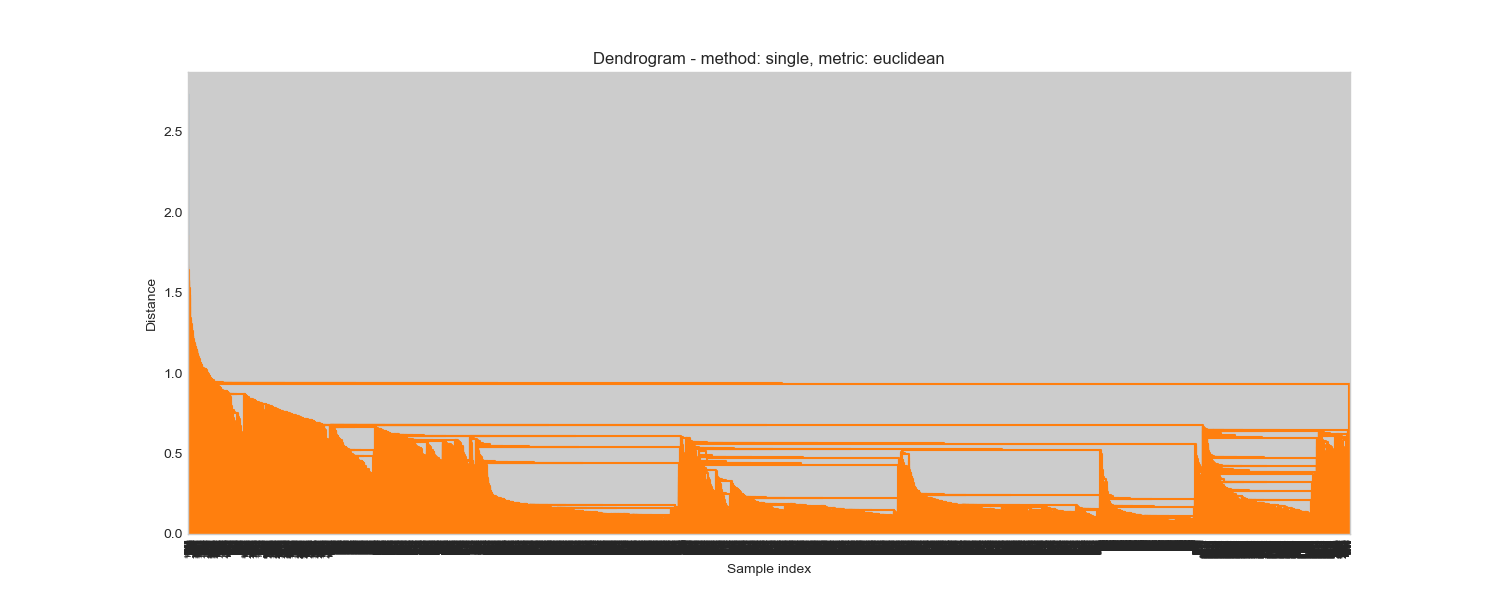

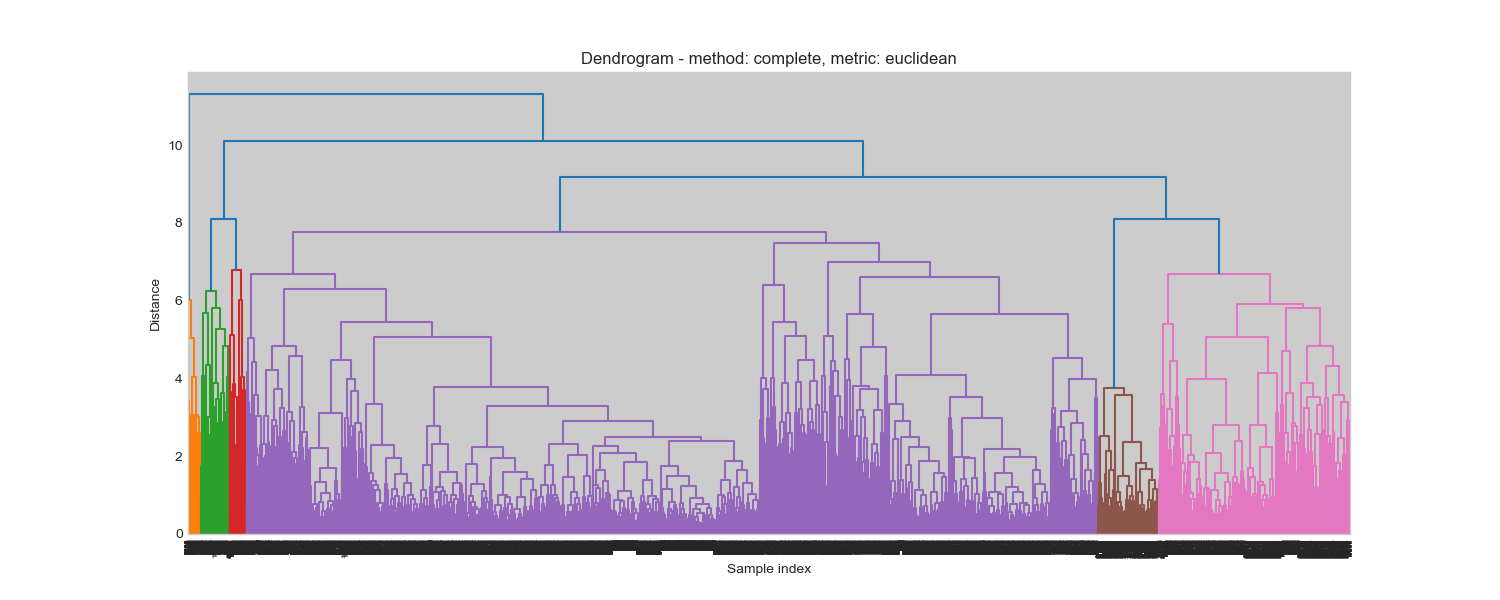

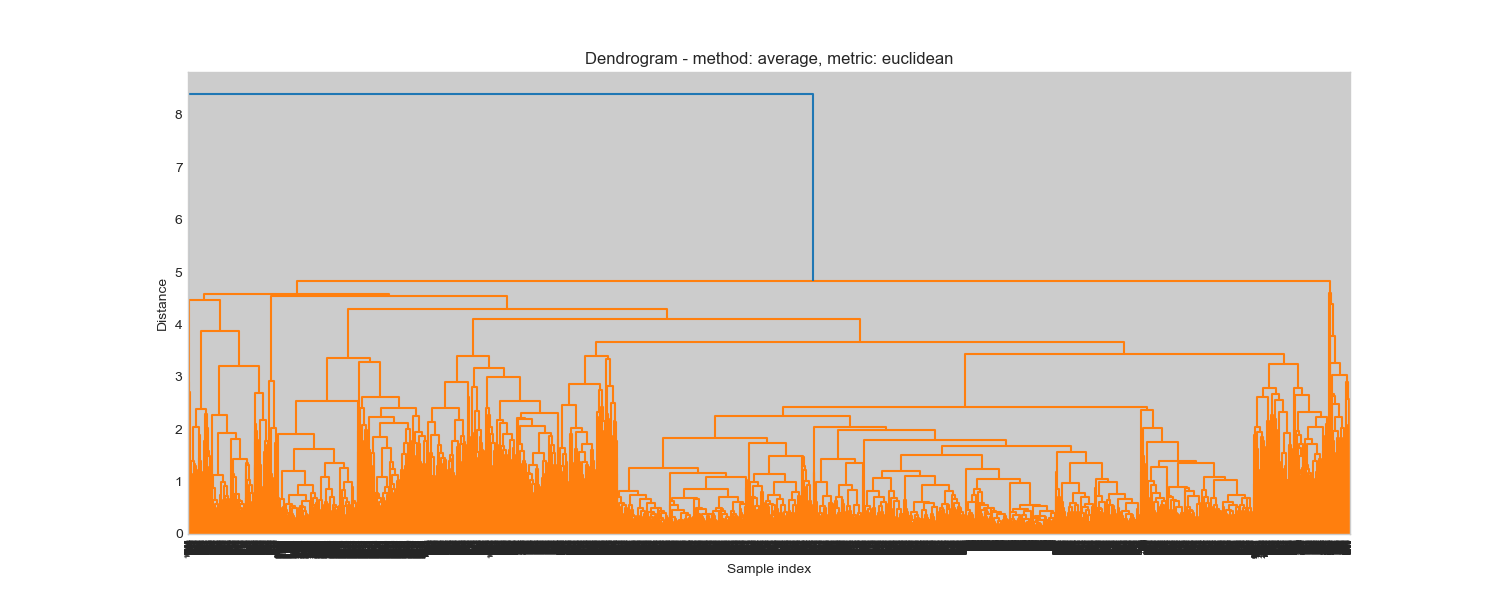

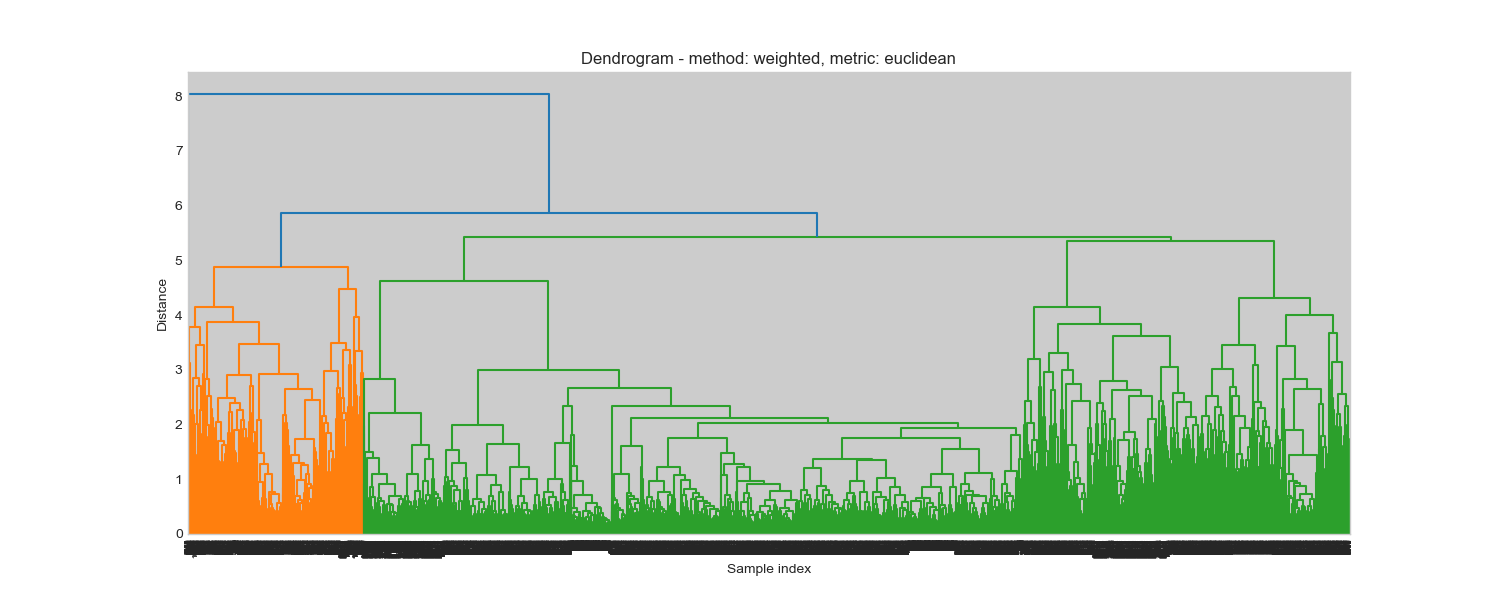

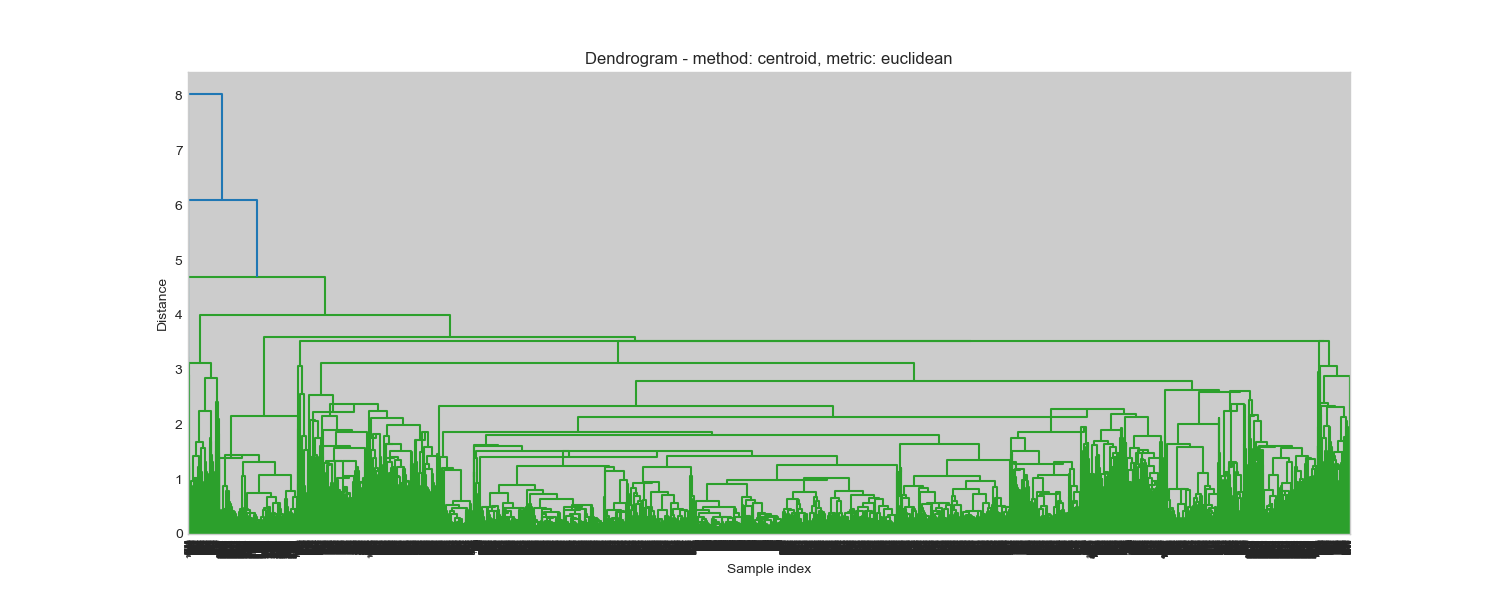

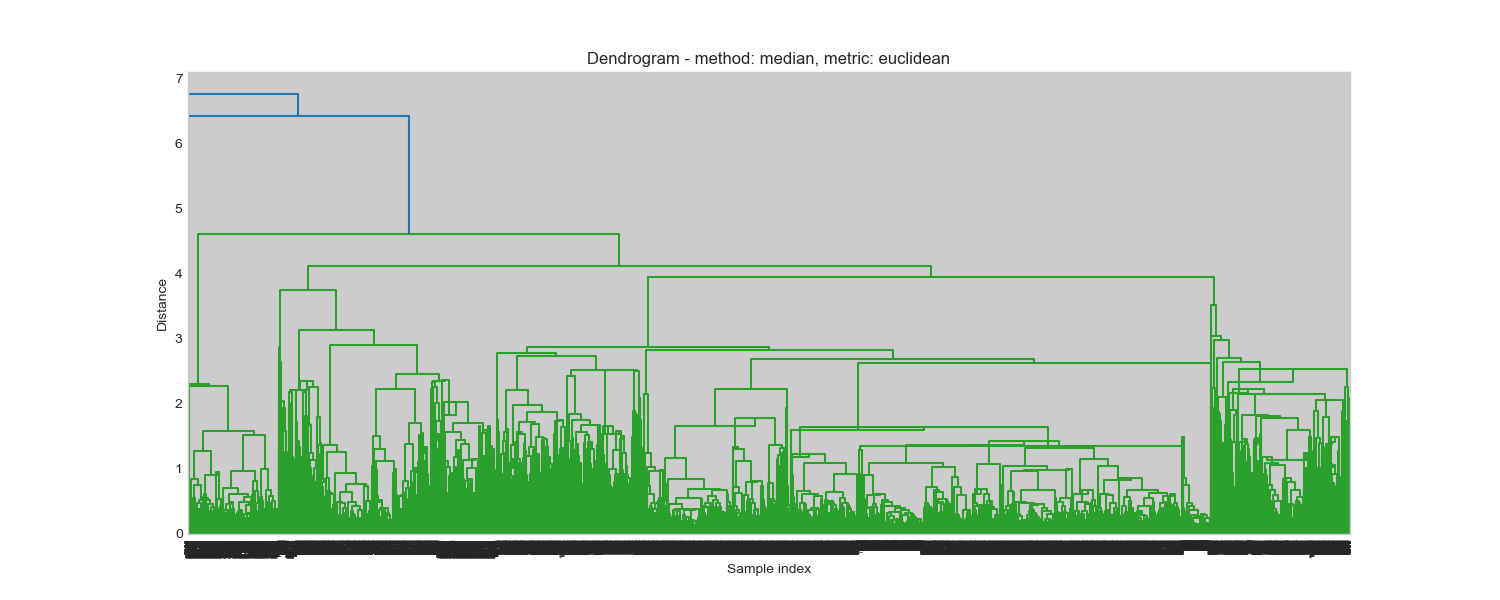

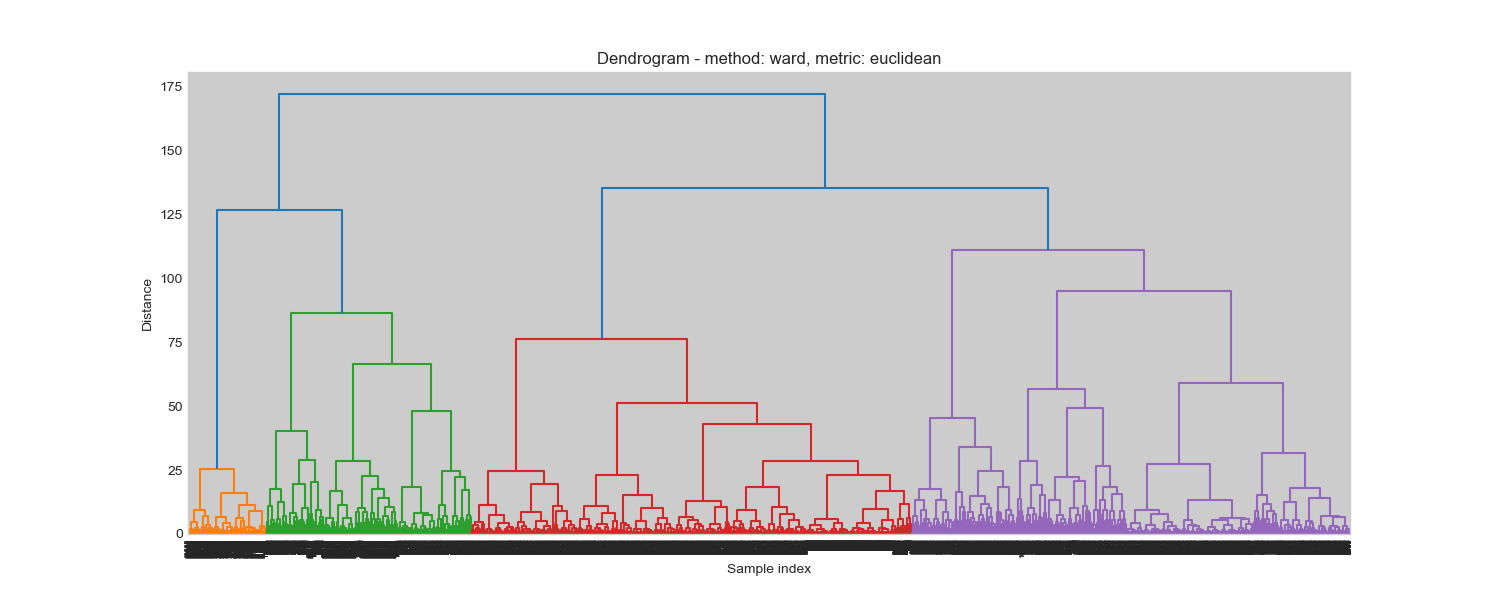

In [38]:
euclidean_res = evaluate_linkage(scaled_data_df_30s, "euclidean", linkage_methods)

In [39]:
linkage_methods.remove("centroid")
linkage_methods.remove("median")
linkage_methods.remove("ward")

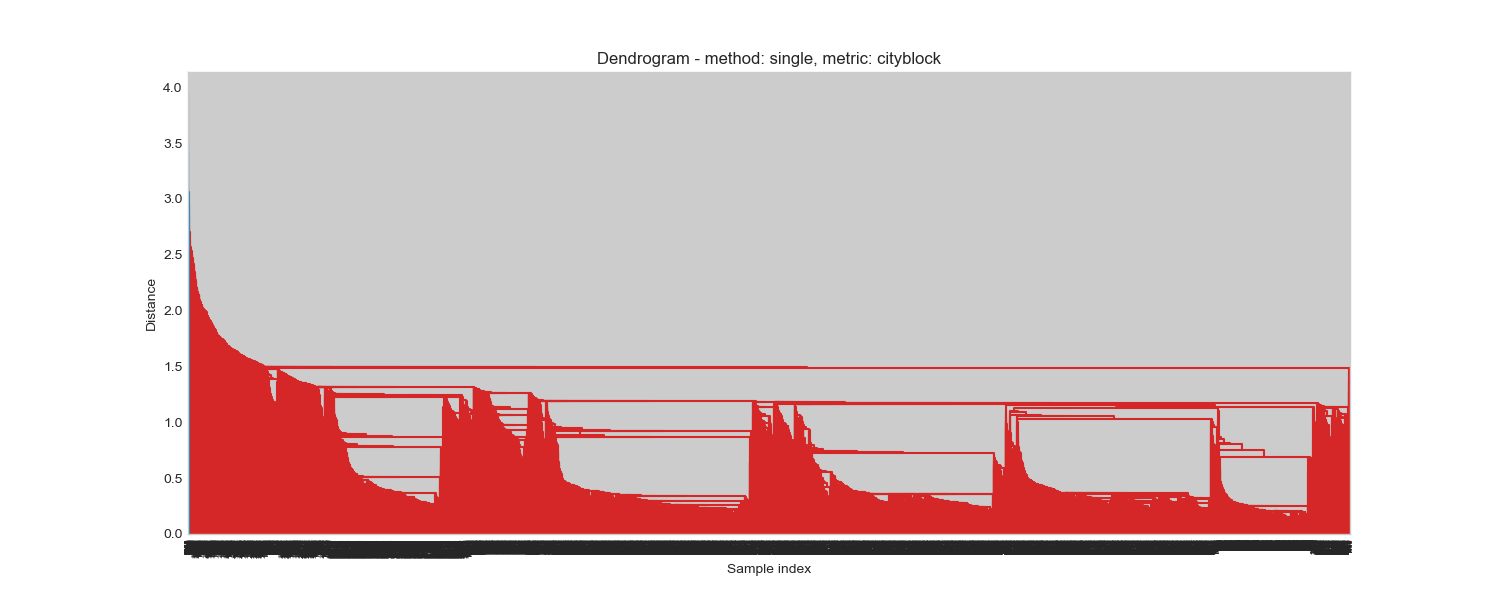

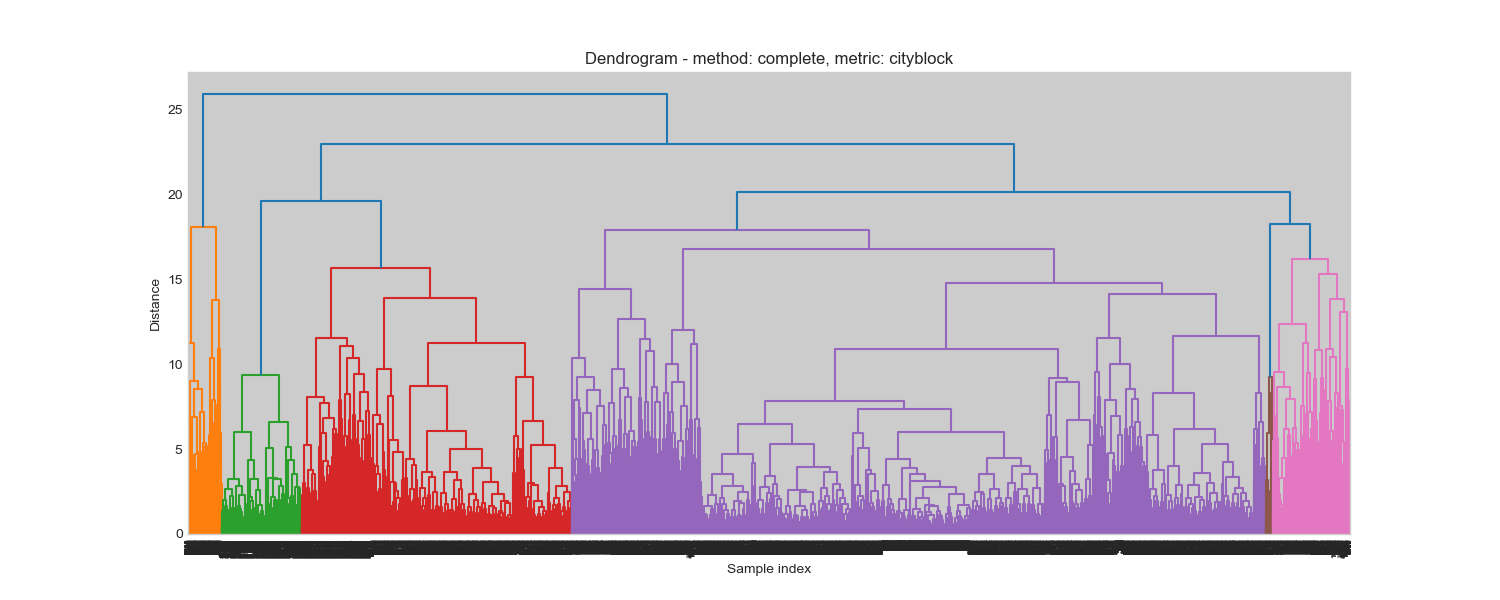

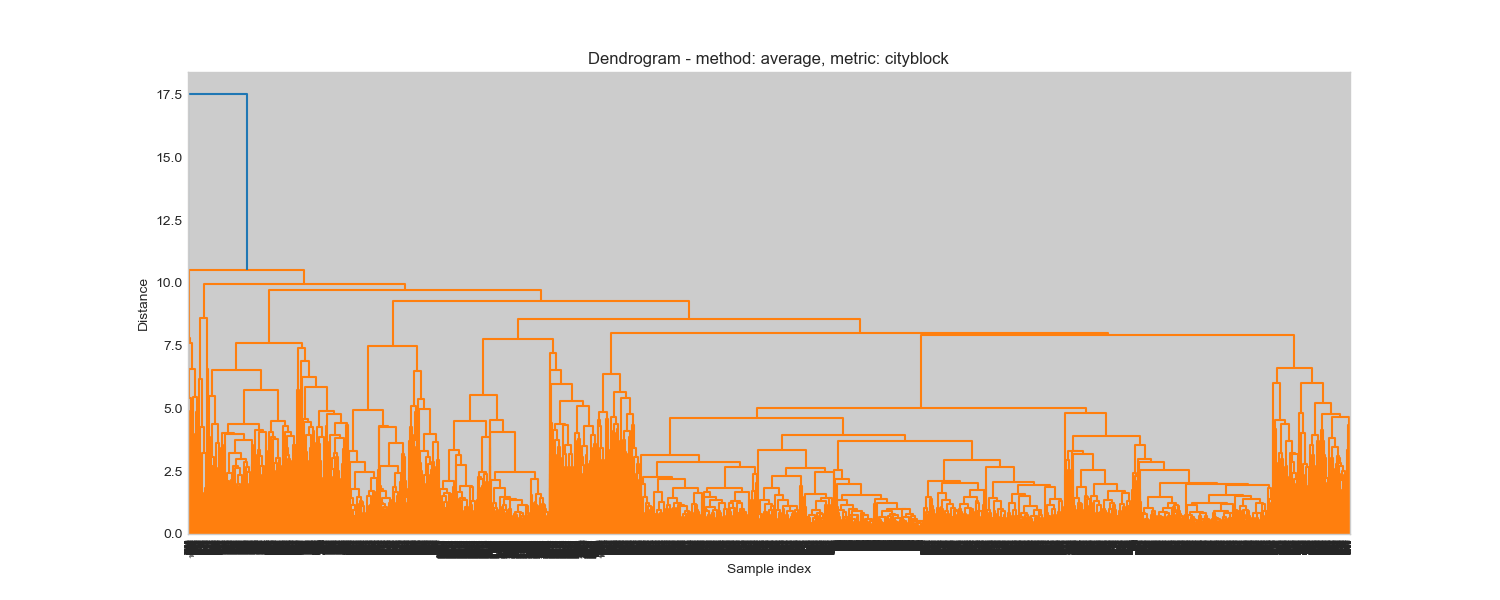

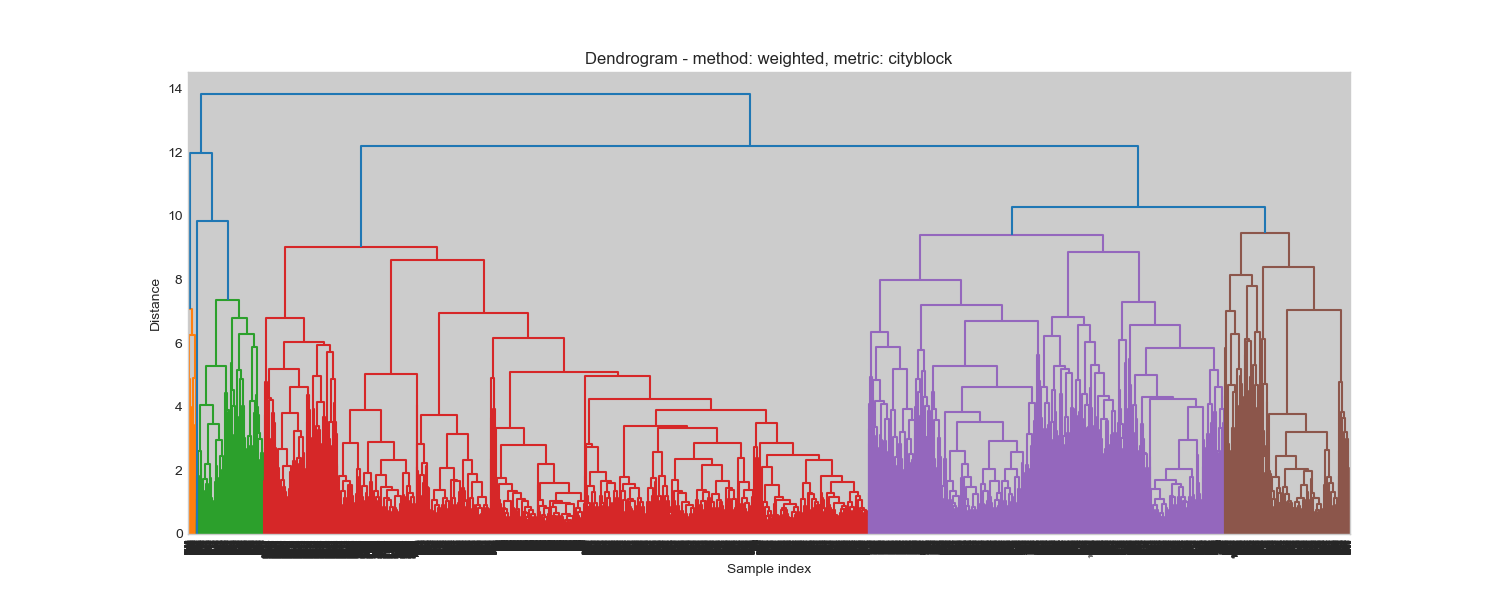

In [40]:
cityblock_res = evaluate_linkage(scaled_data_df_30s, "cityblock", linkage_methods)

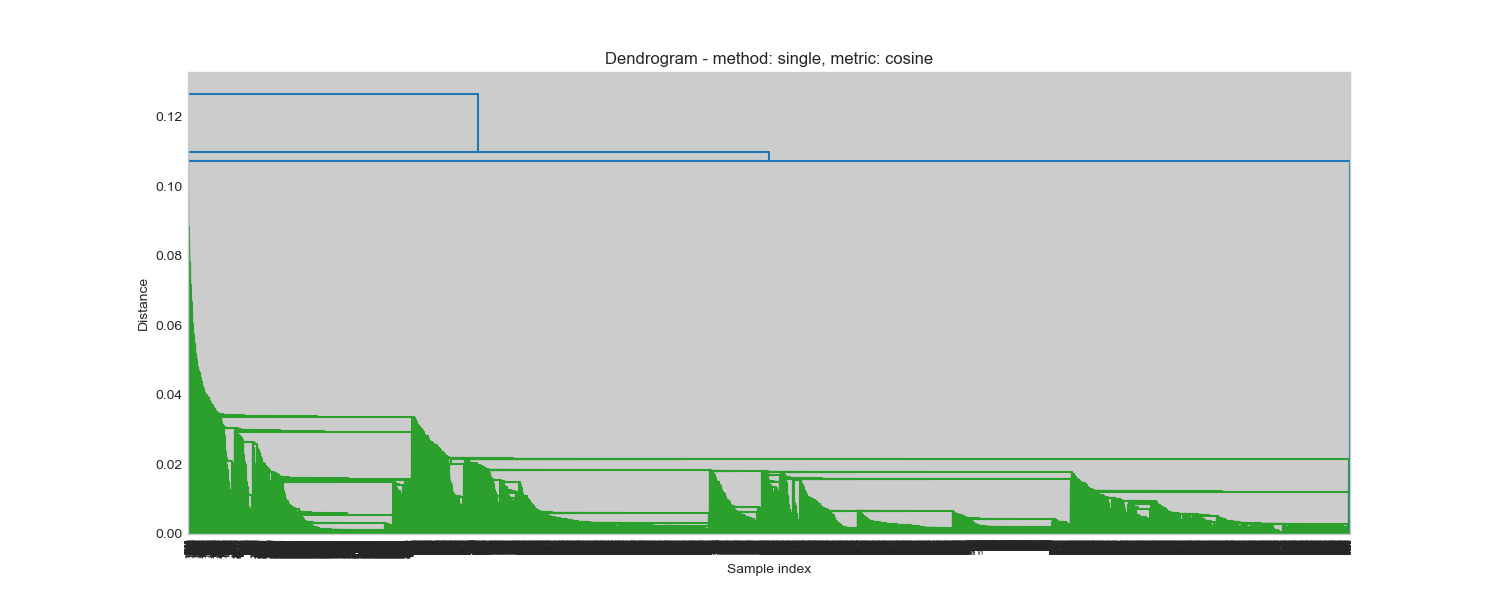

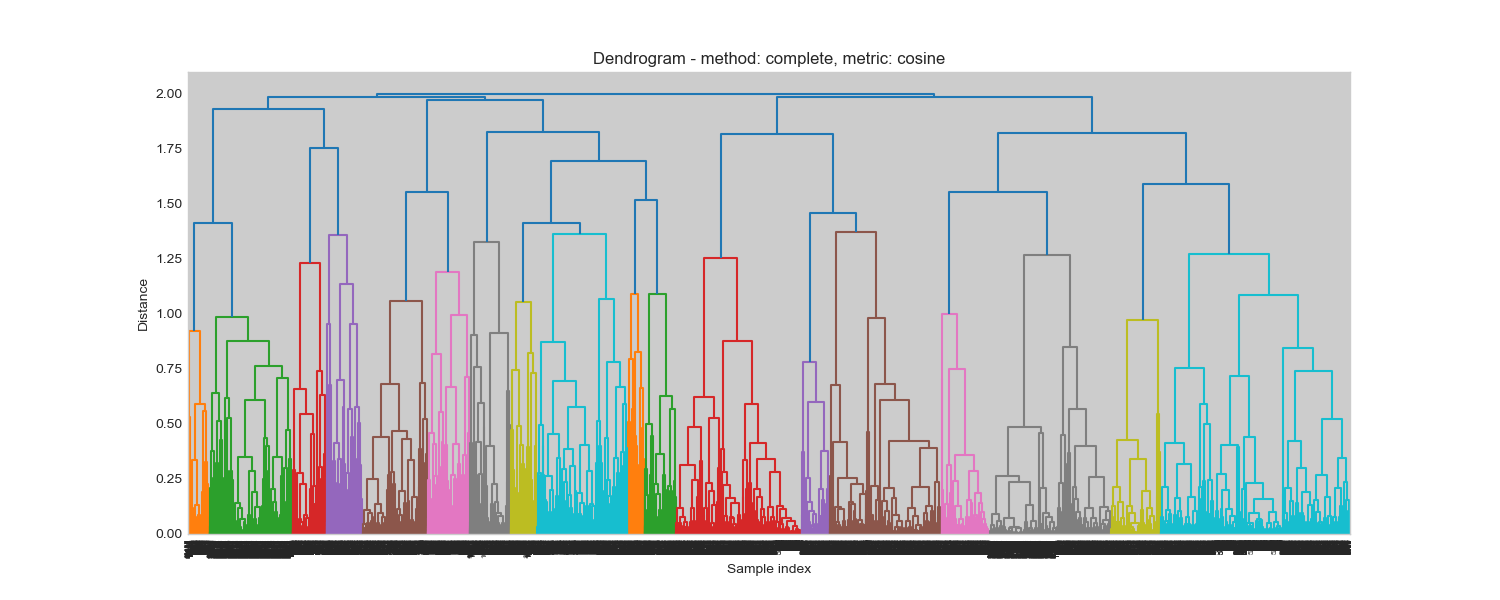

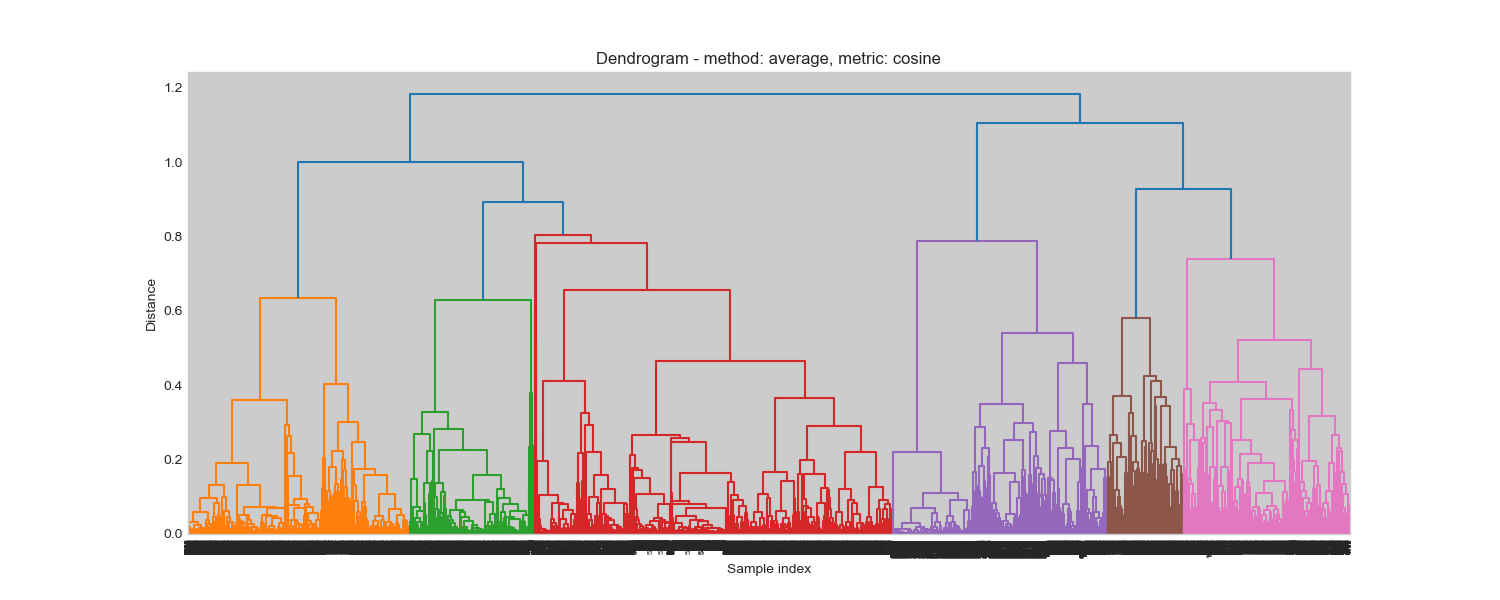

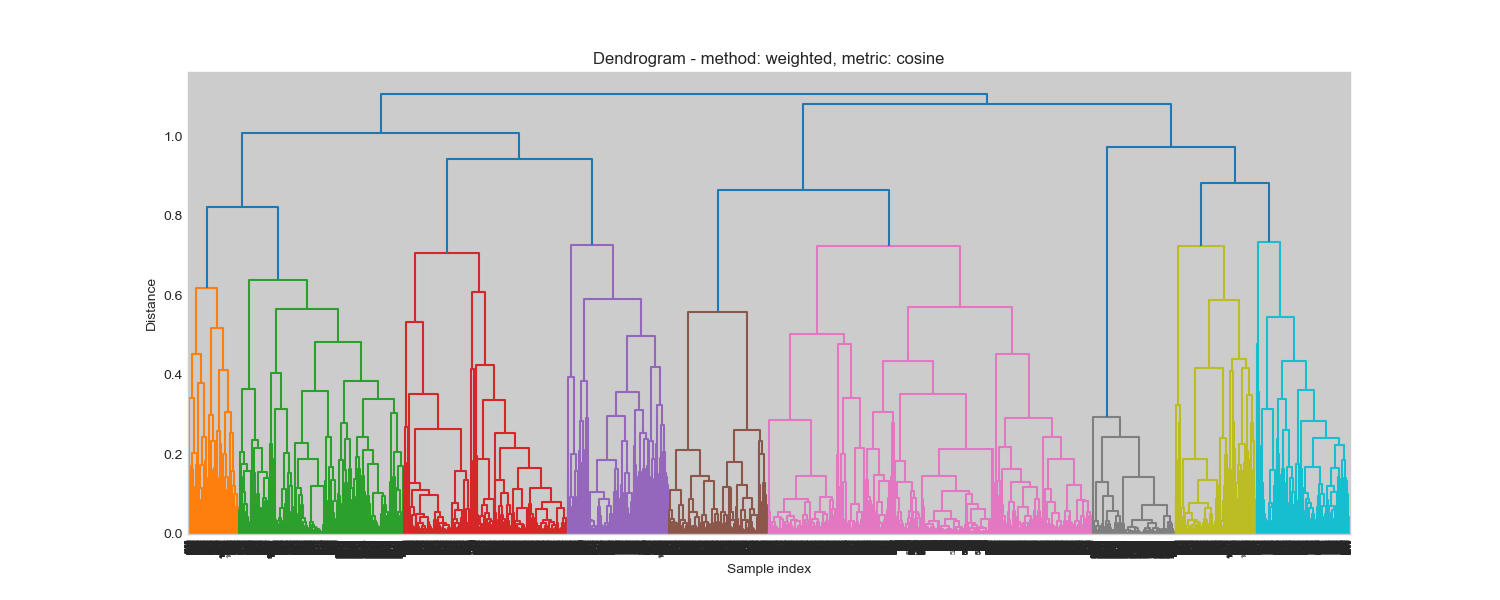

In [41]:
cosine_res = evaluate_linkage(scaled_data_df_30s, "cosine", linkage_methods)

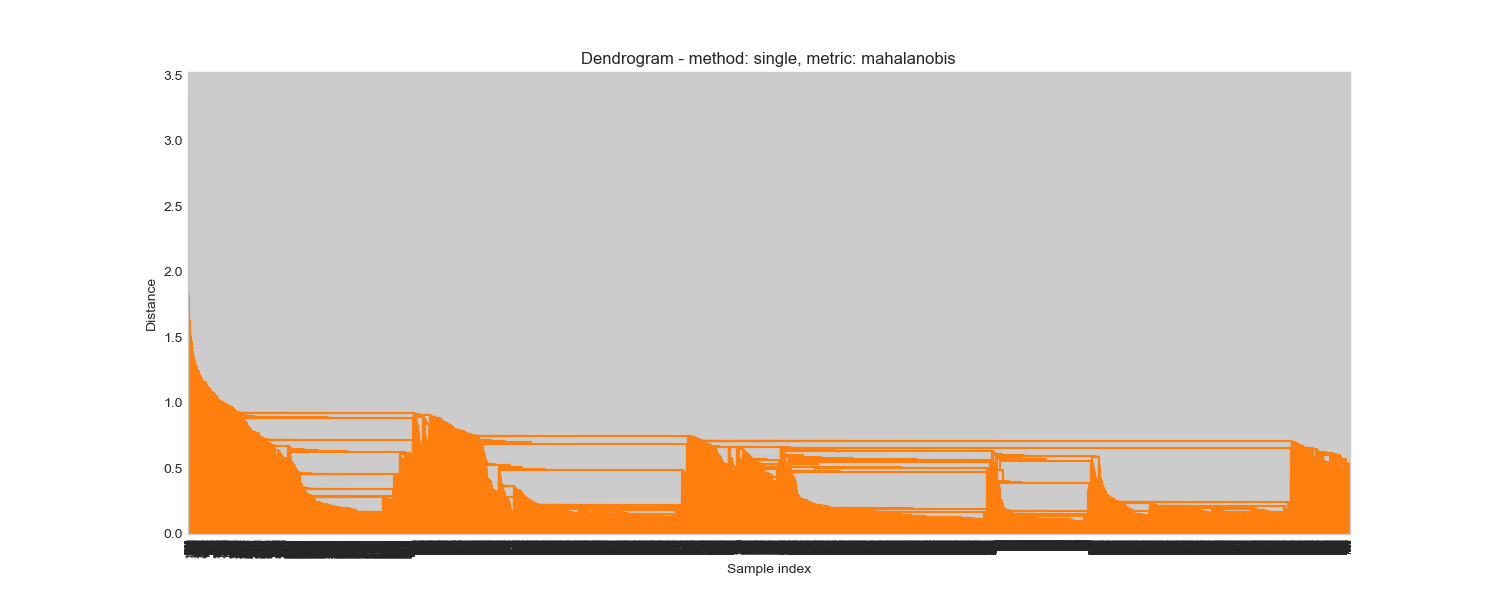

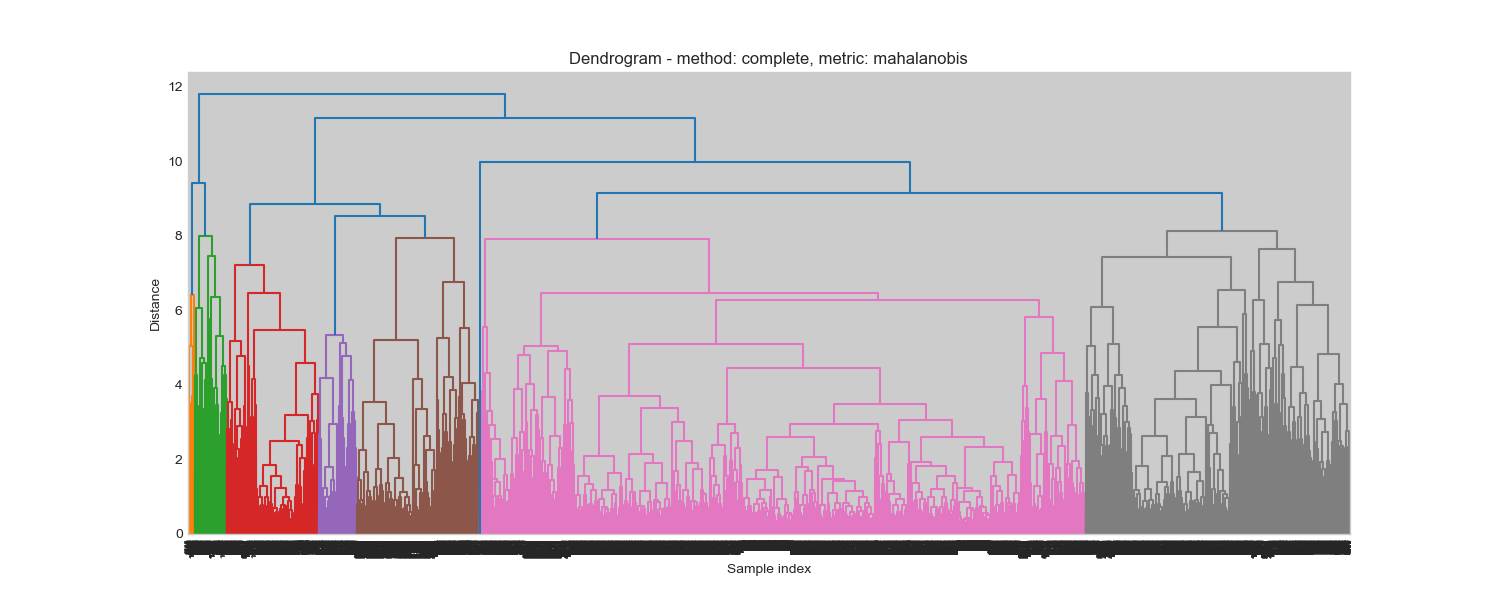

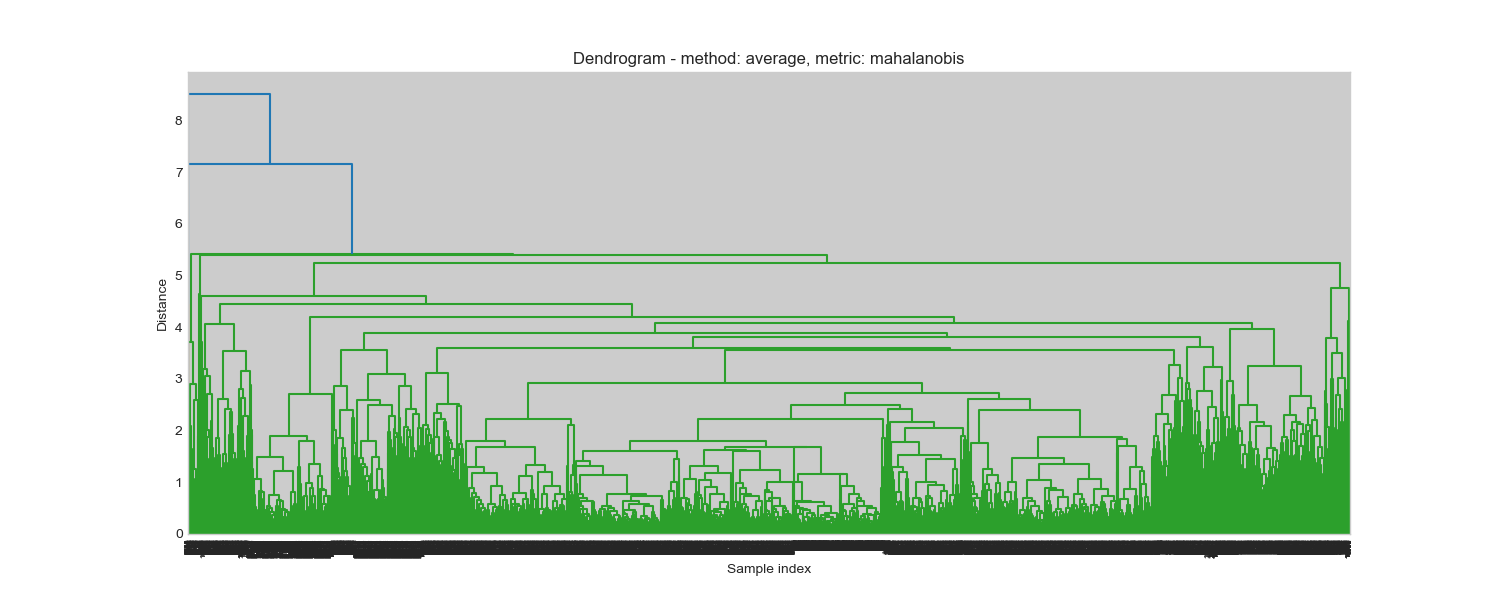

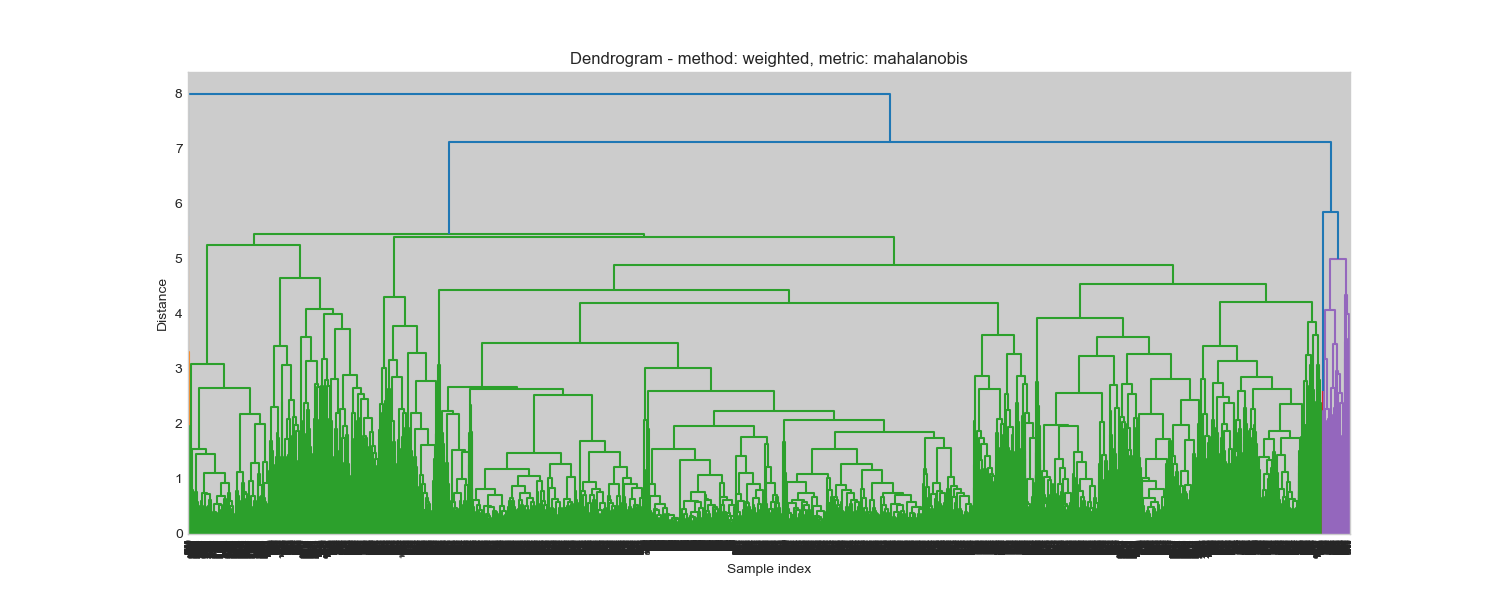

In [42]:
mahalanobis_res = evaluate_linkage(scaled_data_df_30s, "mahalanobis", linkage_methods)

In [43]:
def visualize_coph_coeff(results, metrices, methods):
    df = pd.DataFrame(columns=["Metric/Method"] + methods)
    pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)

    for res, metric in zip(results, metrices):
        row = []
        row.append(metric)
        for method in methods:
            if metric != "euclidean" and method in ["centroid", "median", "ward"]:
                row.append(None)
            else:
                row.append(res["coph_correlations"][method])
        
        df.loc[len(df.index)] = row
        
    print(pdtabulate(df.round(3)))

In [44]:
results = [euclidean_res, cityblock_res, cosine_res, mahalanobis_res]
metrices = ["euclidean", "cityblock", "cosine", "mahalanobis"]
methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

visualize_coph_coeff(results, metrices, methods)

+-----------------+----------+------------+-----------+------------+------------+----------+---------+
| Metric/Method   |   single |   complete |   average |   weighted |   centroid |   median |    ward |
|-----------------+----------+------------+-----------+------------+------------+----------+---------|
| euclidean       |    0.603 |      0.677 |     0.795 |      0.681 |       0.78 |    0.643 |   0.618 |
| cityblock       |    0.56  |      0.606 |     0.748 |      0.576 |     nan    |  nan     | nan     |
| cosine          |    0.35  |      0.532 |     0.673 |      0.528 |     nan    |  nan     | nan     |
| mahalanobis     |    0.624 |      0.579 |     0.777 |      0.705 |     nan    |  nan     | nan     |
+-----------------+----------+------------+-----------+------------+------------+----------+---------+


Najbolji rezultat dobijen je za "euclidean" rastojanje, kada se koristi "ward" metod.

In [45]:
best_linkage = euclidean_res["linkages"]["ward"]

### Četvrti korak - određivanje optimalnog broja klastera

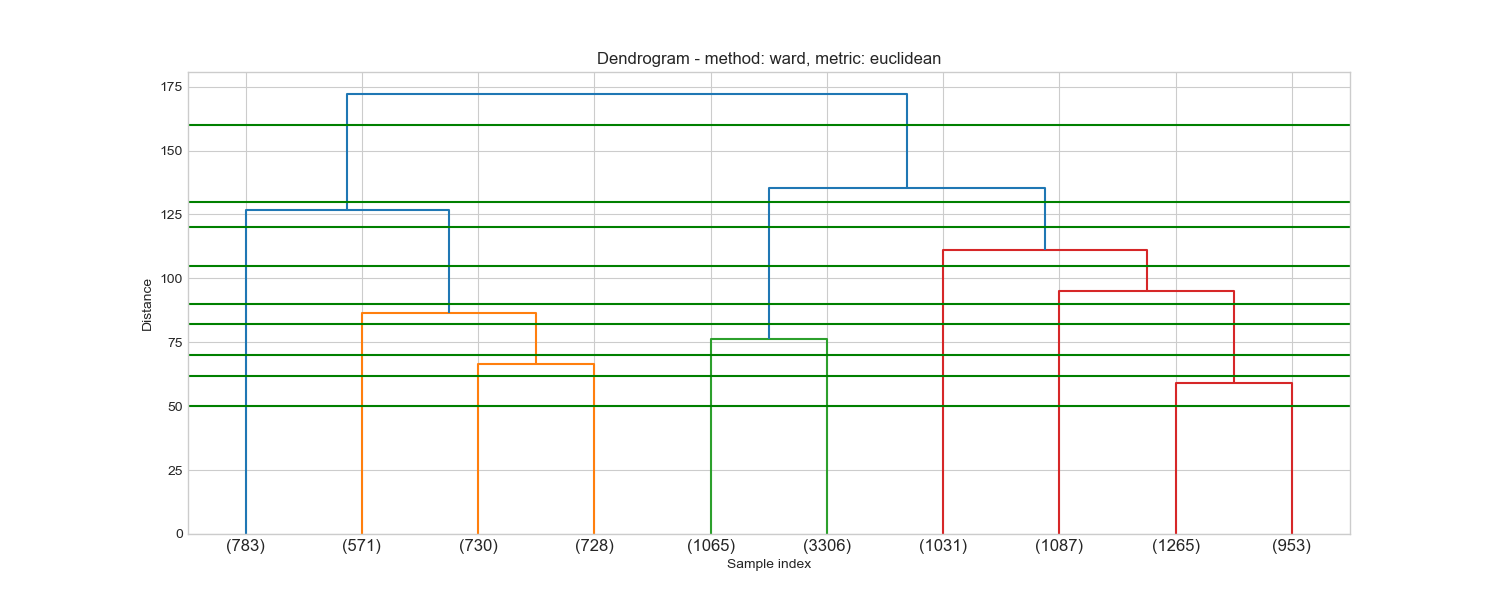

In [48]:
plt.figure(figsize=(15, 6))
dendrogram(best_linkage, truncate_mode="lastp", p=10)
plt.axhline(y=160, color='g', linestyle='-')    # 2 clusters
plt.axhline(y=130, color='g', linestyle='-')    # 3 clusters
plt.axhline(y=120, color='g', linestyle='-')    # 4 clusters
plt.axhline(y=105, color='g', linestyle='-')    # 5 clusters
plt.axhline(y=90, color='g', linestyle='-')     # 6 clusters
plt.axhline(y=82, color='g', linestyle='-')     # 7 clusters
plt.axhline(y=70, color='g', linestyle='-')     # 8 clusters
plt.axhline(y=62, color='g', linestyle='-')     # 9 clusters
plt.axhline(y=50, color='g', linestyle='-')     # 10 clusters
plt.title(f"Dendrogram - method: ward, metric: euclidean")
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [49]:
def find_cluster_num(data, best_linkage, max_distances, score):
    number_of_clusters = 2
    scores = {}

    for distance in max_distances:
        clusters = fcluster(best_linkage, distance, criterion="distance")

        if score == "silhouette_score":
            eval_score = silhouette_score(data, clusters)
        if score == "calinski_harabasz_score":
            eval_score = calinski_harabasz_score(data, clusters)
            
        scores[number_of_clusters] = eval_score
        number_of_clusters = number_of_clusters + 1

    return scores

In [50]:
max_distances = [160, 130, 120, 105, 90, 82, 70, 62, 50]
silhouette_scores = find_cluster_num(scaled_data_df_30s, best_linkage, max_distances, "silhouette_score")
calinski_harabasz_scores = find_cluster_num(scaled_data_df_30s, best_linkage, max_distances, "calinski_harabasz_score")

In [51]:
def visualize_clustering_scores(scores, score_names):
    df = pd.DataFrame(columns=["Score/Clusters"] + list(range(2, 11)))
    pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)

    for score, name in zip(scores, score_names):
        row = []
        row.append(name)
        for key in score.keys():
            row.append(score[key])
        df.loc[len(df.index)] = row
        
    print(pdtabulate(df.round(3)))

In [52]:
scores = [silhouette_scores, calinski_harabasz_scores]
score_names = ["Silhouette", "Calinski-Harabasz"]
visualize_clustering_scores(scores, score_names)

+-------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| Score/Clusters    |        2 |        3 |        4 |        5 |        6 |        7 |        8 |        9 |       10 |
|-------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------|
| Silhouette        |    0.289 |    0.187 |    0.223 |    0.237 |    0.238 |    0.253 |    0.261 |    0.272 |    0.263 |
| Calinski-Harabasz | 2591.98  | 2435.72  | 2525.93  | 2589.97  | 2590.63  | 2606.03  | 2593.31  | 2550.78  | 2409.17  |
+-------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+


Za dalju analizu odabrana su 4 klastera.

### Peti korak - primena i evaluacija algoritma

In [53]:
clusters = fcluster(best_linkage, 120, criterion="distance")
data_30s["Cluster"] = clusters

In [54]:
def evaluate_clusters(features, clusters):
    sil_score = silhouette_score(features, clusters).round(2)
    ch_score = calinski_harabasz_score(features, clusters).round(2)
    db_score = davies_bouldin_score(features, clusters).round(2)

    print("Silhouette score: " + str(sil_score))
    print("Calinski-Harabasz score: " + str(ch_score))
    print("Davies-Bouldin score: " + str(db_score))

In [55]:
evaluate_clusters(scaled_data_df_30s, clusters)

Silhouette score: 0.22
Calinski-Harabasz score: 2525.93
Davies-Bouldin score: 1.47


In [57]:
data_30s["Cluster"].value_counts()

Cluster
3    4371
4    4336
2    2029
1     783
Name: count, dtype: int64

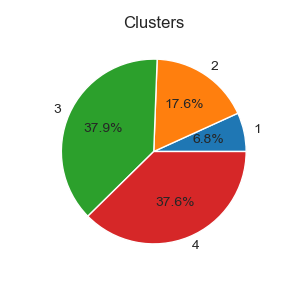

In [58]:
plt.figure(figsize=(3, 3))
plt.title("Clusters")
data_30s.groupby("Cluster").size().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [73]:
def visualize_clusters(features, clusters):
    fig = plt.figure(figsize=(10, 7))

    pca_2d = PCA(n_components=2)
    pcs = pca_2d.fit_transform(features)
    pc1_values_2d = pcs[:, 0]
    pc2_values_2d = pcs[:, 1]
   
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax1.set_title("2D visualization")
    palette = sns.color_palette("bright", n_colors=len(set(clusters)))  
    sns.scatterplot(x=pc1_values_2d, y=pc2_values_2d, hue=clusters, palette=palette, alpha=0.8, legend='full')

    pca_3d = PCA(n_components=3)
    pcs = pca_3d.fit_transform(features)
    pc1_values_3d = pcs[:, 0]
    pc2_values_3d = pcs[:, 1]
    pc3_values_3d = pcs[:, 2]

    ax2 = fig.add_subplot(2, 1, 2, projection="3d", elev=48, azim=134)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.set_zlabel("PC3")
    ax2.set_title("3D visualization")
    cmap = ListedColormap(palette)
    ax2.scatter3D(pc1_values_3d, pc2_values_3d, pc3_values_3d, c=clusters, cmap=cmap)

    plt.tight_layout()

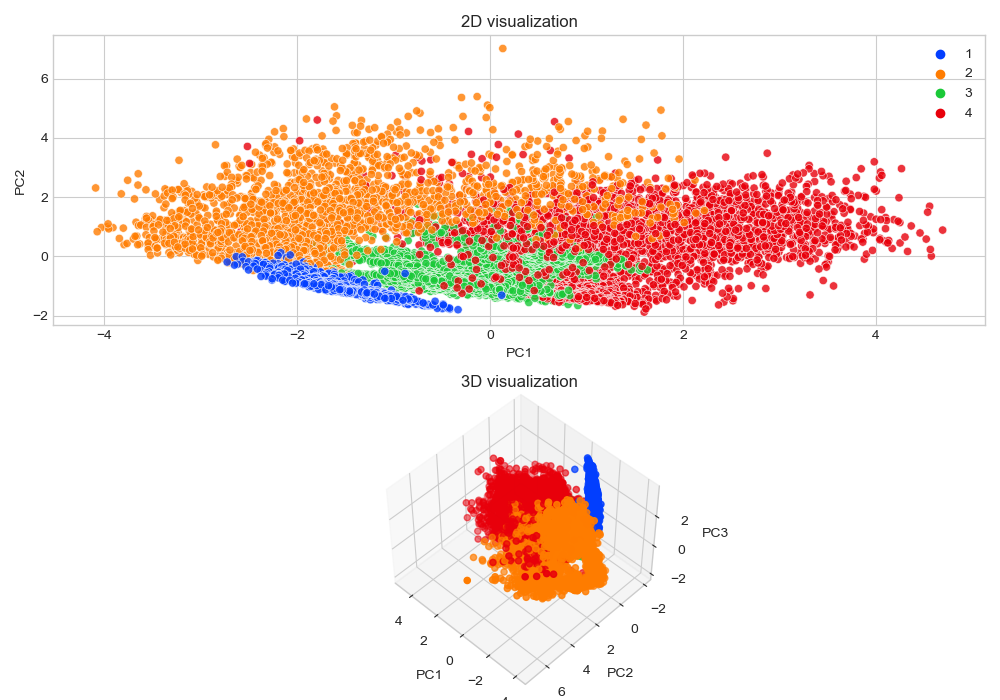

In [74]:
visualize_clusters(scaled_data_df_30s, clusters)

In [61]:
def do_lasso(X, clusters, columns):
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, clusters)
    
    coef = pd.Series(lasso.coef_, index = columns)
    imp_coef = coef.sort_values()
    
    plt.figure(figsize=(12, 5))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    plt.show()

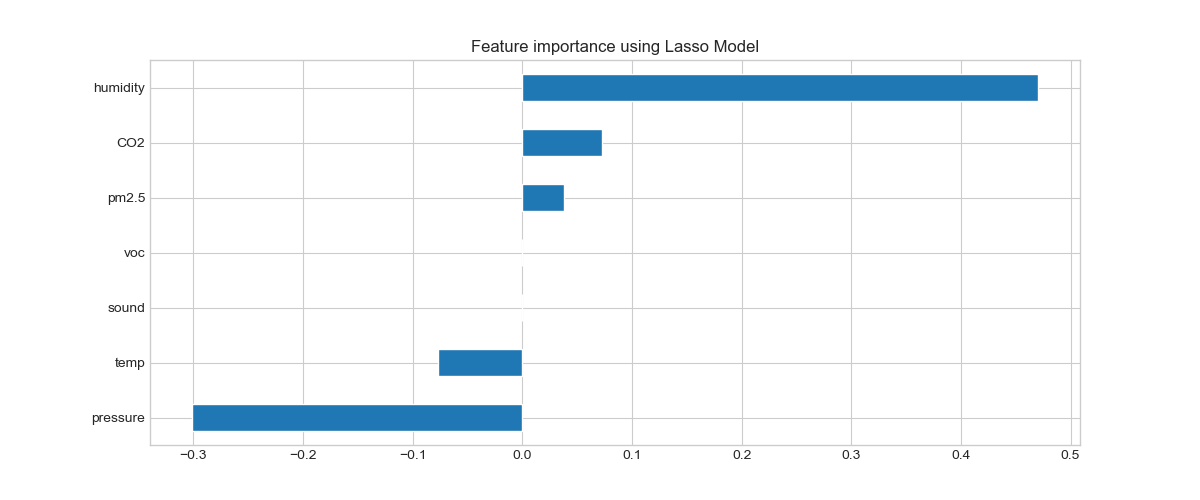

In [62]:
do_lasso(scaled_data_df_30s, clusters, list(scaled_data_df_30s.columns))

In [63]:
features = list(data_30s.columns)
features.remove('Cluster')
data_30s.groupby('Cluster')[features].mean().T

Cluster              1             2             3             4
sound         1.139869      1.079220      1.051852      0.974708
pressure   1022.338917   1014.980093   1013.314047   1014.876056
temp         26.320558     26.798312     24.587209     24.661588
humidity     33.509526     30.946012     34.211108     36.996133
voc       29457.093231  31586.230245  29997.727980  30723.753709
pm1.0        32.342912     64.475850     33.665637     62.879497
pm2.5        46.918263     80.490718     48.993251     86.990391
pm10         58.636015     89.329391     61.129947     98.285901
CO2         449.787995    423.315639    432.727018    460.178232

Klaster 1: Povećan pritisak, povišena temperatura, blago povećana koncentracija CO2, blago povećana buka

Klaster 2: Smanjena vlažnost, povišena temperatura, povećana koncentracija PM čestica, blago povecana koncentracija lako isparljivih jedinjenja

Klaster 3: Normalno stanje sa prosečnim vrednostima parametara

Klaster 4: Povećana vlažnost, povećana koncentracija CO2, povećana koncentracija PM čestica

In [68]:
result = pd.DataFrame()
result["timestamp"] = data_30s.index
result["cluster"] = data_30s.Cluster.values
result.to_csv('result.csv', index=False)